In [154]:
import pandas as pd
berlin_traffic=pd.read_csv('output.csv')

In [155]:
berlin_traffic.shape

(460259, 25)

In [156]:
berlin_traffic.columns

Index(['instance_id', 'segment_id', 'date', 'interval', 'uptime', 'heavy',
       'car', 'bike', 'pedestrian', 'night', 'heavy_lft', 'heavy_rgt',
       'car_lft', 'car_rgt', 'bike_lft', 'bike_rgt', 'pedestrian_lft',
       'pedestrian_rgt', 'night_lft', 'night_rgt', 'direction',
       'car_speed_hist_0to70plus', 'car_speed_hist_0to120plus', 'timezone',
       'v85'],
      dtype='object')

In [157]:
berlin_traffic.head(3)

instance_id  segment_id                      date interval  uptime  heavy  \
0           -1  9000002582  2024-01-01T00:00:00.000Z   hourly     0.0    0.0   
1           -1  9000002582  2024-01-01T01:00:00.000Z   hourly     0.0    0.0   
2           -1  9000002582  2024-01-01T02:00:00.000Z   hourly     0.0    0.0   

   car  bike  pedestrian  night  ...  bike_rgt  pedestrian_lft  \
0  0.0   0.0         0.0    NaN  ...       0.0             0.0   
1  0.0   0.0         0.0    NaN  ...       0.0             0.0   
2  0.0   0.0         0.0    NaN  ...       0.0             0.0   

   pedestrian_rgt  night_lft  night_rgt  direction  \
0             0.0        NaN        NaN          1   
1             0.0        NaN        NaN          1   
2             0.0        NaN        NaN          1   

                   car_speed_hist_0to70plus  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   

                           car_speed_hist_0to120plus       timezone  v85  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  Europe/Berlin  NaN  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  Europe/Berlin  NaN  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  Europe/Berlin  NaN  

[3 rows x 25 columns]

In [158]:
berlin_traffic.tail(3)

instance_id  segment_id                      date interval    uptime  \
460256           -1  9000007680  2024-11-30T21:00:00.000Z   hourly  0.999722   
460257           -1  9000007680  2024-11-30T22:00:00.000Z   hourly  0.999444   
460258           -1  9000007680  2024-11-30T23:00:00.000Z   hourly  0.999444   

        heavy  car  bike  pedestrian       night  ...  bike_rgt  \
460256    1.0  5.0   0.0         0.0  1702.00000  ...       0.0   
460257    0.0  0.0   0.0         0.0  1558.00000  ...       0.0   
460258    0.0  0.0   0.0         0.0  1257.63029  ...       0.0   

        pedestrian_lft  pedestrian_rgt   night_lft   night_rgt  direction  \
460256             0.0             0.0  921.000000  781.000000          1   
460257             0.0             0.0  809.000000  749.000000          1   
460258             0.0             0.0  578.267261  679.363029          1   

                          car_speed_hist_0to70plus  \
460256  [80.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
460257    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
460258    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   

                                car_speed_hist_0to120plus       timezone   v85  
460256  [40.0, 40.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....  Europe/Berlin  11.0  
460257  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  Europe/Berlin   NaN  
460258  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  Europe/Berlin   NaN  

[3 rows x 25 columns]

In [159]:
import numpy as np
import pandas as pd

extracted_segments=[]

## only get segments which have data from january to november 2024

for segment in np.unique(berlin_traffic['segment_id']):
    segment_traffic = berlin_traffic[berlin_traffic['segment_id'] == segment]
    
    # Ensure the 'date' column is in datetime format
    segment_traffic.loc[:,'date'] = pd.to_datetime(segment_traffic['date'])

    # Sort the DataFrame by the 'date' column in ascending order
    segment_traffic_sorted = segment_traffic.sort_values(by='date')
    
    # Access the first and last date for the sorted segment
    start_date = segment_traffic_sorted.iloc[0]['date']
    end_date = segment_traffic_sorted.iloc[-1]['date']

    if start_date.date()<=pd.to_datetime('2024-01-01').date():
        extracted_segments.append(segment)
    
        # Print the results
        print(f'segment {segment} start date {start_date} end date {end_date}')
    
len(extracted_segments)

segment 9000002582 start date 2024-01-01 00:00:00+00:00 end date 2024-11-30 23:00:00+00:00
segment 9000002889 start date 2024-01-01 00:00:00+00:00 end date 2024-11-30 23:00:00+00:00
segment 9000003000 start date 2024-01-01 00:00:00+00:00 end date 2024-11-30 23:00:00+00:00
segment 9000003077 start date 2024-01-01 00:00:00+00:00 end date 2024-11-30 23:00:00+00:00
segment 9000003088 start date 2024-01-01 00:00:00+00:00 end date 2024-11-30 23:00:00+00:00
segment 9000003172 start date 2024-01-01 00:00:00+00:00 end date 2024-11-30 23:00:00+00:00
segment 9000003310 start date 2024-01-01 00:00:00+00:00 end date 2024-11-30 23:00:00+00:00
segment 9000003320 start date 2024-01-01 00:00:00+00:00 end date 2024-11-30 23:00:00+00:00
segment 9000003520 start date 2024-01-01 00:00:00+00:00 end date 2024-11-30 23:00:00+00:00
segment 9000003561 start date 2024-01-01 00:00:00+00:00 end date 2024-11-30 23:00:00+00:00
segment 9000003564 start date 2024-01-01 00:00:00+00:00 end date 2024-11-30 23:00:00+00:00

50

In [160]:
berlin_traffic_filtered= berlin_traffic[berlin_traffic['segment_id'].isin(extracted_segments)]
berlin_traffic_filtered.shape

(358623, 25)

In [161]:
berlin_traffic_filtered.columns

Index(['instance_id', 'segment_id', 'date', 'interval', 'uptime', 'heavy',
       'car', 'bike', 'pedestrian', 'night', 'heavy_lft', 'heavy_rgt',
       'car_lft', 'car_rgt', 'bike_lft', 'bike_rgt', 'pedestrian_lft',
       'pedestrian_rgt', 'night_lft', 'night_rgt', 'direction',
       'car_speed_hist_0to70plus', 'car_speed_hist_0to120plus', 'timezone',
       'v85'],
      dtype='object')

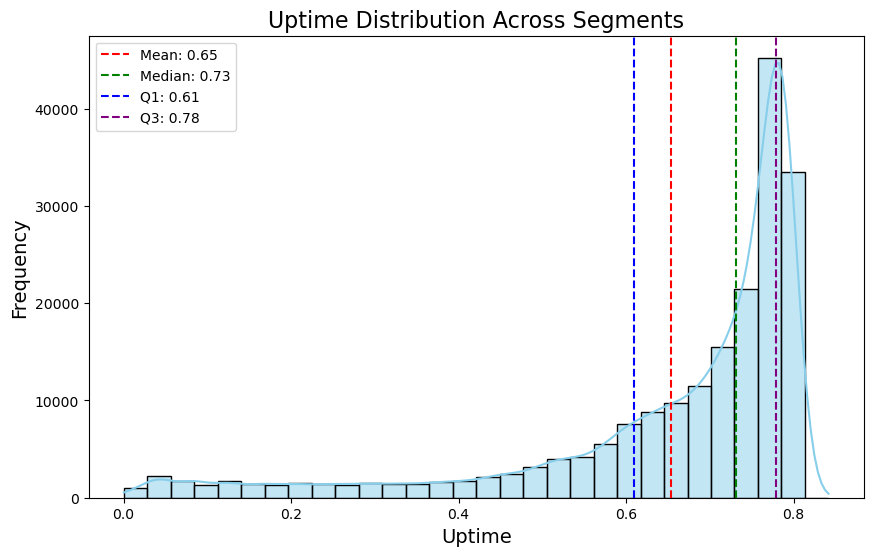

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

berlin_traffic_filtered_uptime_0 = berlin_traffic_filtered[berlin_traffic_filtered['uptime'] > 0]

plt.figure(figsize=(10, 6))
sns.histplot(berlin_traffic_filtered_uptime_0['uptime'], kde=True, bins=30, color='skyblue', edgecolor='black')

mean_uptime = berlin_traffic_filtered_uptime_0['uptime'].mean()
median_uptime = berlin_traffic_filtered_uptime_0['uptime'].median()
q1_uptime = berlin_traffic_filtered_uptime_0['uptime'].quantile(0.25)
q3_uptime = berlin_traffic_filtered_uptime_0['uptime'].quantile(0.75)

plt.axvline(mean_uptime, color='red', linestyle='--', label=f'Mean: {mean_uptime:.2f}')
plt.axvline(median_uptime, color='green', linestyle='--', label=f'Median: {median_uptime:.2f}')
plt.axvline(q1_uptime, color='blue', linestyle='--', label=f'Q1: {q1_uptime:.2f}')
plt.axvline(q3_uptime, color='purple', linestyle='--', label=f'Q3: {q3_uptime:.2f}')

plt.title('Uptime Distribution Across Segments', fontsize=16)
plt.xlabel('Uptime', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.legend()

# Save the plot as a PNG file
plt.savefig('uptime_distribution.png', dpi=300)

# Show plot
plt.show()


- A threshold of 0.5 will be chosen because, excluding very low uptime values is more reliable

In [163]:
berlin_traffic_filtered=berlin_traffic_filtered[berlin_traffic_filtered['uptime']>=0.5]
berlin_traffic_filtered.shape

(167787, 25)

In [164]:
berlin_traffic_filtered['hour']=pd.to_datetime(berlin_traffic_filtered['date']).dt.hour
def get_time_interval(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 10:
        return 'Morning'
    elif 10 <= hour < 14:
        return 'Midday'
    elif 14 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

# Step 2: Create a new column 'time_interval' based on the 'hour' column
berlin_traffic_filtered['time_interval'] = berlin_traffic_filtered['hour'].apply(get_time_interval)

## Merge with the name and length of the segment

In [165]:
segments_length=pd.read_csv('segments_length.csv')
berlin_traffic_filtered = pd.merge(berlin_traffic_filtered, segments_length, on='segment_id', how='inner')  # Use 'inner', 'left', 'right', or 'outer' as needed
berlin_traffic_filtered.head(5)

instance_id  segment_id                      date interval    uptime  \
0           -1  9000002582  2024-01-01T08:00:00.000Z   hourly  0.798333   
1           -1  9000002582  2024-01-01T09:00:00.000Z   hourly  0.791111   
2           -1  9000002582  2024-01-01T10:00:00.000Z   hourly  0.804167   
3           -1  9000002582  2024-01-01T11:00:00.000Z   hourly  0.790556   
4           -1  9000002582  2024-01-01T12:00:00.000Z   hourly  0.794444   

       heavy         car       bike  pedestrian  night  ...  direction  \
0   1.293103   31.186486  36.734590    2.576984    NaN  ...          1   
1   3.801060   74.396432  20.420038    0.000000    NaN  ...          1   
2   7.490177   69.363774  67.637787    3.791324    NaN  ...          1   
3   8.932851  120.113064  34.230636    2.567760    NaN  ...          1   
4  23.749686  133.431179  59.436894    0.000000    NaN  ...          1   

                            car_speed_hist_0to70plus  \
0  [3.9316967412, 8.2927166898, 27.7015517658, 44...   
1  [6.8311746069, 6.6610901434, 50.8795511477, 33...   
2  [10.8725784431, 1.8562335468, 33.7654976024, 4...   
3  [9.5552562119, 9.4468565922, 47.2585704078, 28...   
4  [7.5236701848, 4.7259156628, 50.8015344806, 31...   

                           car_speed_hist_0to120plus       timezone   v85  \
0  [3.9316967412, 0.0, 8.2927166898, 0.0, 8.23356...  Europe/Berlin  40.5   
1  [1.6895746368, 5.1415999701, 4.9715155066, 1.6...  Europe/Berlin  35.5   
2  [3.6096217215, 7.2629567216, 0.0, 1.8562335468...  Europe/Berlin  38.5   
3  [5.2827293601, 4.2725268519, 2.1227140776, 7.3...  Europe/Berlin  34.5   
4  [2.7909977962, 4.7326723886, 1.9000179089, 2.8...  Europe/Berlin  34.5   

   hour  time_interval                                        coordinates  \
0     8        Morning  [[[13.406749894, 52.509225703], [13.407258794,...   
1     9        Morning  [[[13.406749894, 52.509225703], [13.407258794,...   
2    10         Midday  [[[13.406749894, 52.509225703], [13.407258794,...   
3    11         Midday  [[[13.406749894, 52.509225703], [13.407258794,...   
4    12         Midday  [[[13.406749894, 52.509225703], [13.407258794,...   

   segment_length           streets  
0        0.078943  Alte Jakobstraße  
1        0.078943  Alte Jakobstraße  
2        0.078943  Alte Jakobstraße  
3        0.078943  Alte Jakobstraße  
4        0.078943  Alte Jakobstraße  

[5 rows x 30 columns]

- Since the uptime is different between segments, normalize the car, bike, pedestrian and heavy count such that:

  Normalized count = observed count / uptime

In [166]:
berlin_traffic_filtered['normalized_car'] = berlin_traffic_filtered['car'] / berlin_traffic_filtered['uptime']
berlin_traffic_filtered['normalized_bike'] = berlin_traffic_filtered['bike'] / berlin_traffic_filtered['uptime']
berlin_traffic_filtered['normalized_pedestrian'] = berlin_traffic_filtered['pedestrian'] / berlin_traffic_filtered['uptime']
berlin_traffic_filtered['normalized_heavy'] = berlin_traffic_filtered['heavy'] / berlin_traffic_filtered['uptime']

In [167]:
for segment in np.unique(berlin_traffic_filtered['segment_id']):
    print('segment: ',segment,np.unique(berlin_traffic_filtered[berlin_traffic_filtered['segment_id']==segment]['segment_length']))

segment:  9000002582 [0.07894332]
segment:  9000003000 [0.05806724]
segment:  9000003077 [0.06881164]
segment:  9000003088 [0.05504798]
segment:  9000003172 [0.06771925]
segment:  9000003320 [0.05510827]
segment:  9000003520 [0.1131772]
segment:  9000003561 [0.0627504]
segment:  9000003564 [0.06044878]
segment:  9000003738 [0.0661403]
segment:  9000003747 [0.058995]
segment:  9000003760 [0.10762143]
segment:  9000003769 [0.0561106]
segment:  9000003786 [0.05506779]
segment:  9000003997 [0.05608677]
segment:  9000004016 [0.0562686]
segment:  9000004024 [0.10655493]
segment:  9000004039 [0.13274455]
segment:  9000004074 [0.05560111]
segment:  9000004118 [0.0550479]
segment:  9000004132 [0.05506192]
segment:  9000004233 [0.09506857]
segment:  9000004284 [0.20113821]
segment:  9000004544 [0.08632213]
segment:  9000004545 [0.06510902]
segment:  9000004546 [0.07060426]
segment:  9000004562 [0.05942251]
segment:  9000004597 [0.05634559]
segment:  9000004602 [0.0567605]
segment:  9000004669 [0

- Since the segment length is different we could normalize the number of traffic by the segment length to allow to compare different segments
- Since longer segments naturally have higher counts, normalize
- This ensures that shorter segments aren’t unfairly flagged as low-traffic anomalies.

In [168]:
berlin_traffic_filtered.head(5)

instance_id  segment_id                      date interval    uptime  \
0           -1  9000002582  2024-01-01T08:00:00.000Z   hourly  0.798333   
1           -1  9000002582  2024-01-01T09:00:00.000Z   hourly  0.791111   
2           -1  9000002582  2024-01-01T10:00:00.000Z   hourly  0.804167   
3           -1  9000002582  2024-01-01T11:00:00.000Z   hourly  0.790556   
4           -1  9000002582  2024-01-01T12:00:00.000Z   hourly  0.794444   

       heavy         car       bike  pedestrian  night  ...   v85  hour  \
0   1.293103   31.186486  36.734590    2.576984    NaN  ...  40.5     8   
1   3.801060   74.396432  20.420038    0.000000    NaN  ...  35.5     9   
2   7.490177   69.363774  67.637787    3.791324    NaN  ...  38.5    10   
3   8.932851  120.113064  34.230636    2.567760    NaN  ...  34.5    11   
4  23.749686  133.431179  59.436894    0.000000    NaN  ...  34.5    12   

   time_interval                                        coordinates  \
0        Morning  [[[13.406749894, 52.509225703], [13.407258794,...   
1        Morning  [[[13.406749894, 52.509225703], [13.407258794,...   
2         Midday  [[[13.406749894, 52.509225703], [13.407258794,...   
3         Midday  [[[13.406749894, 52.509225703], [13.407258794,...   
4         Midday  [[[13.406749894, 52.509225703], [13.407258794,...   

   segment_length           streets  normalized_car  normalized_bike  \
0        0.078943  Alte Jakobstraße       39.064491        46.014100   
1        0.078943  Alte Jakobstraße       94.040433        25.811846   
2        0.078943  Alte Jakobstraße       86.255471        84.109166   
3        0.078943  Alte Jakobstraße      151.935007        43.299469   
4        0.078943  Alte Jakobstraße      167.955330        74.815671   

   normalized_pedestrian  normalized_heavy  
0               3.227954          1.619754  
1               0.000000          4.804711  
2               4.714599          9.314210  
3               3.248045         11.299460  
4               0.000000         29.894709  

[5 rows x 34 columns]

In [169]:
berlin_traffic_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142589 entries, 0 to 142588
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   instance_id                142589 non-null  int64  
 1   segment_id                 142589 non-null  int64  
 2   date                       142589 non-null  object 
 3   interval                   142589 non-null  object 
 4   uptime                     142589 non-null  float64
 5   heavy                      142589 non-null  float64
 6   car                        142589 non-null  float64
 7   bike                       142589 non-null  float64
 8   pedestrian                 142589 non-null  float64
 9   night                      0 non-null       float64
 10  heavy_lft                  142589 non-null  float64
 11  heavy_rgt                  142589 non-null  float64
 12  car_lft                    142589 non-null  float64
 13  car_rgt                    14

- Mean traffic within each segment

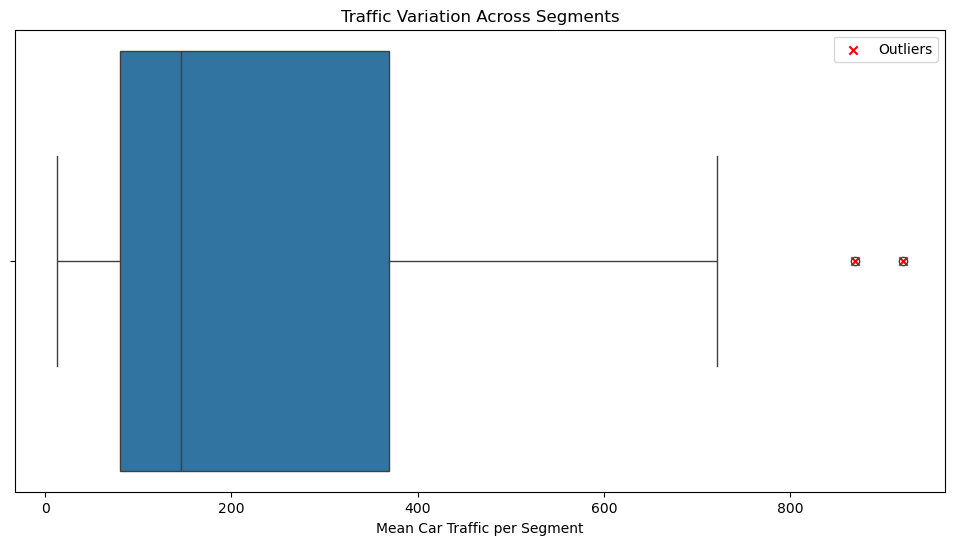

    segment_id  mean_car_traffic
10  9000003747        920.751619
29  9000004669        869.257802


In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by segment_id and calculate the mean of normalized car traffic
segment_mean_traffic = berlin_traffic_filtered.groupby('segment_id')['normalized_car'].mean().reset_index()
segment_mean_traffic.columns = ['segment_id', 'mean_car_traffic']

# Calculate Q1, Q3, and IQR
Q1 = segment_mean_traffic['mean_car_traffic'].quantile(0.25)
Q3 = segment_mean_traffic['mean_car_traffic'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = segment_mean_traffic[
    (segment_mean_traffic['mean_car_traffic'] < lower_bound) | 
    (segment_mean_traffic['mean_car_traffic'] > upper_bound)
]

# Create the boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=segment_mean_traffic, x='mean_car_traffic')

# Add red 'X' marks for outliers
plt.scatter(outliers['mean_car_traffic'], [0] * len(outliers), color='red', marker='x', label='Outliers')

# Set plot title and labels
plt.title('Traffic Variation Across Segments')
plt.xlabel('Mean Car Traffic per Segment')

# Show the plot
plt.legend()
plt.savefig('traffic_across_segments.png', dpi=300)
plt.show()


# Print outliers
print(outliers)


In [171]:
cv = np.std(segment_mean_traffic['mean_car_traffic']) / np.mean(segment_mean_traffic['mean_car_traffic'])
cv

0.9398802764463943

- cofficient of variation is greater than 0.5 which mean there is a gret varaition of traffic between segments
- The box is wide  (large IQR), meaning traffic differs significantly between segments.
- Whiskers are long, indicating high variability.
- Many outliers, suggesting extreme traffic in some segments.

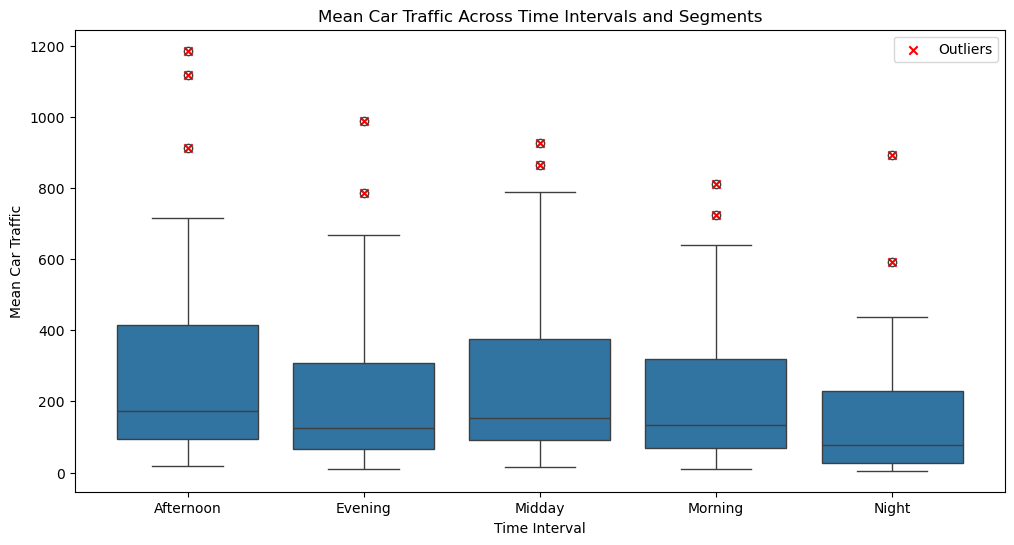

     segment_id time_interval  mean_car_traffic  mean_car_traffic_Q1  \
50   9000003747     Afternoon       1117.837401            95.606761   
51   9000003747       Evening        785.690247            65.532747   
52   9000003747        Midday        925.550991            90.744642   
53   9000003747       Morning        811.882406            69.204851   
54   9000003747         Night        892.406716            27.994453   
145  9000004669     Afternoon       1186.019290            95.606761   
146  9000004669       Evening        989.426158            65.532747   
147  9000004669        Midday        863.650012            90.744642   
148  9000004669       Morning        724.209037            69.204851   
149  9000004669         Night        591.493281            27.994453   
185  9000005010     Afternoon        911.620088            95.606761   

     mean_car_traffic_Q3  mean_car_traffic_IQR  
50            414.060396            318.453635  
51            308.597240            2

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by segment_id and time_interval, calculate the mean normalized car traffic
mean_traffic_by_interval = berlin_traffic_filtered.groupby(['segment_id', 'time_interval'])['normalized_car'].mean().reset_index()
mean_traffic_by_interval.columns = ['segment_id', 'time_interval', 'mean_car_traffic']

# Calculate Q1, Q3, and IQR for each time interval
Q1 = mean_traffic_by_interval.groupby('time_interval')['mean_car_traffic'].quantile(0.25)
Q3 = mean_traffic_by_interval.groupby('time_interval')['mean_car_traffic'].quantile(0.75)
IQR = Q3 - Q1

# Merge the IQR, Q1, and Q3 back into the original data
mean_traffic_by_interval = mean_traffic_by_interval.merge(Q1, on='time_interval', suffixes=('', '_Q1'))
mean_traffic_by_interval = mean_traffic_by_interval.merge(Q3, on='time_interval', suffixes=('', '_Q3'))
mean_traffic_by_interval = mean_traffic_by_interval.merge(IQR, on='time_interval', suffixes=('', '_IQR'))

# Define outliers for each time interval using IQR
lower_bound = mean_traffic_by_interval['mean_car_traffic_Q1'] - 1.5 * mean_traffic_by_interval['mean_car_traffic_IQR']
upper_bound = mean_traffic_by_interval['mean_car_traffic_Q3'] + 1.5 * mean_traffic_by_interval['mean_car_traffic_IQR']

# Identify outliers
outliers = mean_traffic_by_interval[
    (mean_traffic_by_interval['mean_car_traffic'] < lower_bound) | 
    (mean_traffic_by_interval['mean_car_traffic'] > upper_bound)
]

# Create boxplots for each time interval
plt.figure(figsize=(12, 6))
sns.boxplot(x='time_interval', y='mean_car_traffic', data=mean_traffic_by_interval)

# Add red 'X' marks for outliers
plt.scatter(outliers['time_interval'], outliers['mean_car_traffic'], color='red', marker='x', label='Outliers')

# Set plot title and labels
plt.title('Mean Car Traffic Across Time Intervals and Segments')
plt.xlabel('Time Interval')
plt.ylabel('Mean Car Traffic')

# Show the plot
plt.legend()
plt.savefig('traffic_across_segments_time_interval.png', dpi=300)
plt.show()

# Print outliers
print(outliers)


In [173]:
berlin_traffic_filtered[berlin_traffic_filtered['segment_id']==9000003747]['streets'].iloc[0]

'Lückstraße'

In [174]:
berlin_traffic_filtered[berlin_traffic_filtered['segment_id']==9000004669]['streets'].iloc[0]

'Reinickendorfer Straße'

In [175]:
berlin_traffic_filtered[berlin_traffic_filtered['segment_id']==9000005010]['streets'].iloc[0]

'Bruno-Bauer-Straße'

In [176]:
np.unique(berlin_traffic_filtered['streets'])

array(['Alte Jakobstraße', 'Bruno-Bauer-Straße', 'Dammweg', 'Donaustraße',
       'Fuldastraße', 'Galenusstraße', 'Gartenstraße', 'Gertrudstraße',
       'Glasower Straße', 'Grenzstraße', 'Grolmanstraße',
       'Handjerystraße', 'Hauptstraße', 'Heidelberger Straße',
       'Hentigstraße', 'Ilsestraße', 'Jessnerstraße',
       'Karl-Kunger-Straße', 'Kiefholzstraße', 'Koppenstraße',
       'Langenscheidtstraße', 'Lückstraße', 'Mengerzeile',
       'Niederbarnimstraße', 'Oderberger Straße', 'Oldenburger Straße',
       'Puderstraße', 'Rathausstraße', 'Reinickendorfer Straße',
       'Rheinsteinstraße', 'Rhenser Weg', 'Rungiusstraße',
       'Schivelbeiner Straße', 'Schottstraße', 'Simplonstraße',
       'Treptower Straße', 'Trojanstraße', 'Wandlitzstraße',
       'Weserstraße', 'Willibald-Alexis-Straße',
       'Württembergische Straße'], dtype=object)

  time_interval         cv
0     Afternoon  45.615709
1       Evening  46.242137
2        Midday  44.265645
3       Morning  54.151810
4         Night  77.553591


/var/folders/r7/xbd75fl13wvf24ktcp53cf1h0000gn/T/ipykernel_45381/4045355944.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




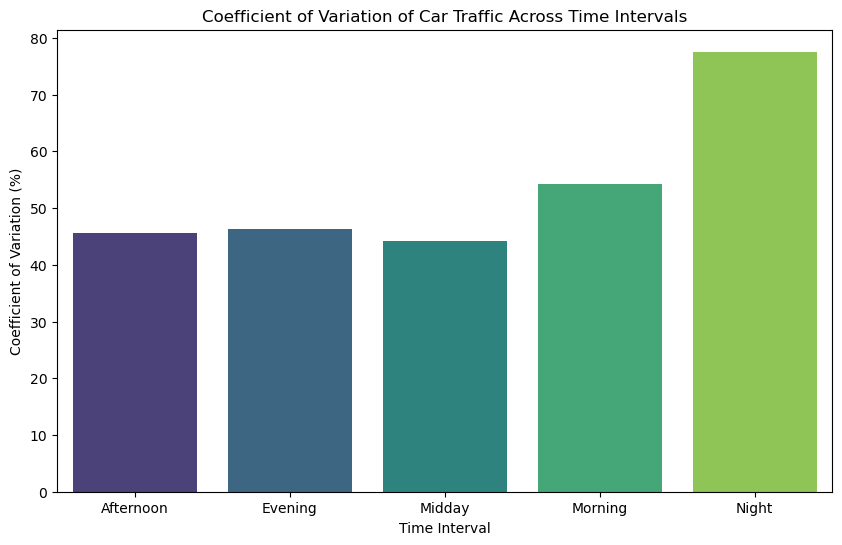

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by segment_id and time_interval, calculate the mean and standard deviation of normalized car traffic
traffic_stats_by_interval = berlin_traffic_filtered.groupby(['segment_id', 'time_interval'])['normalized_car'].agg(['mean', 'std']).reset_index()

# Calculate the Coefficient of Variation (CV) for each time interval
traffic_stats_by_interval['cv'] = (traffic_stats_by_interval['std'] / traffic_stats_by_interval['mean']) * 100

# Calculate the CV for each time interval
cv_by_interval = traffic_stats_by_interval.groupby('time_interval')['cv'].mean().reset_index()

# Print the CV for each time interval
print(cv_by_interval)

# Create a bar plot to show the CV across time intervals
plt.figure(figsize=(10, 6))
sns.barplot(x='time_interval', y='cv', data=cv_by_interval, palette='viridis')

# Set plot title and labels
plt.title('Coefficient of Variation of Car Traffic Across Time Intervals')
plt.xlabel('Time Interval')
plt.ylabel('Coefficient of Variation (%)')

# Show the plot
plt.show()


In [178]:
import pandas as pd

# Initialize the 'anomaly' column to False for all rows
berlin_traffic_filtered['anomaly'] = False

# Group by segment_id and time_interval, calculate the IQR for normalized_car
for (segment_id, time_interval), group in berlin_traffic_filtered.groupby(['segment_id', 'time_interval']):
    # Calculate Q1, Q3, and IQR for normalized_car for each group
    Q1 = group['normalized_car'].quantile(0.25)
    Q3 = group['normalized_car'].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers and update the 'anomaly' column
    anomaly_condition = (group['normalized_car'] < lower_bound) | (group['normalized_car'] > upper_bound)
    berlin_traffic_filtered.loc[group.index, 'anomaly'] = anomaly_condition

# Show the DataFrame with the new 'anomaly' column
print(berlin_traffic_filtered[['segment_id', 'time_interval', 'normalized_car', 'anomaly']].head())


   segment_id time_interval  normalized_car  anomaly
0  9000002582       Morning       39.064491    False
1  9000002582       Morning       94.040433    False
2  9000002582        Midday       86.255471    False
3  9000002582        Midday      151.935007    False
4  9000002582        Midday      167.955330    False


In [179]:
np.unique(berlin_traffic_filtered[berlin_traffic_filtered['anomaly']==True]['segment_id'])

array([9000002582, 9000003000, 9000003077, 9000003088, 9000003172,
       9000003320, 9000003520, 9000003561, 9000003564, 9000003738,
       9000003747, 9000003760, 9000003769, 9000003786, 9000003997,
       9000004016, 9000004024, 9000004039, 9000004074, 9000004118,
       9000004132, 9000004233, 9000004284, 9000004544, 9000004545,
       9000004546, 9000004562, 9000004597, 9000004602, 9000004669,
       9000004676, 9000004685, 9000004712, 9000004869, 9000004912,
       9000004915, 9000004995, 9000005010, 9000005832, 9000005887,
       9000005919, 9000005977])

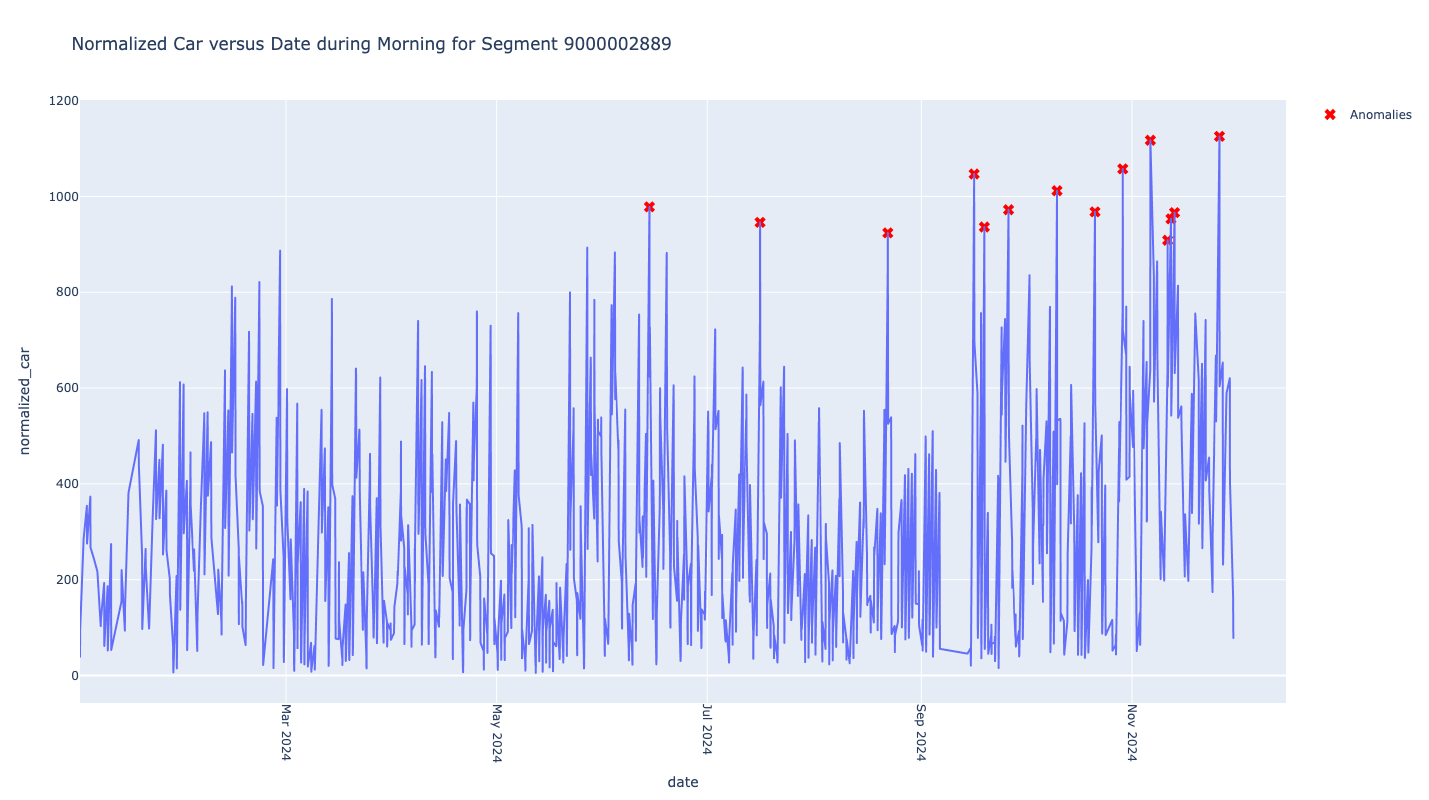

In [180]:
import plotly.express as px

# Filter and sort data
berlin_traffic_street = berlin_traffic_filtered[
    (berlin_traffic_filtered['segment_id'] == 9000002582) & 
    (berlin_traffic_filtered['time_interval'] == 'Morning')
].copy()  # Avoid SettingWithCopyWarning

berlin_traffic_street = berlin_traffic_street.sort_values('date')

# Create line chart for traffic trends
fig = px.line(berlin_traffic_street, 
              x='date', 
              y='normalized_car', 
              title="Normalized Car versus Date during Morning for Segment 9000002889")

# Filter out the anomalies based on the 'anomaly' column
outliers = berlin_traffic_street[berlin_traffic_street['anomaly'] == True]

# Add red X markers for anomalies using add_scatter
fig.add_scatter(
    x=outliers['date'], 
    y=outliers['normalized_car'], 
    mode='markers', 
    marker=dict(color='red', symbol='x', size=10),
    name='Anomalies',
    text=pd.to_datetime(outliers['date']).dt.strftime('%Y-%m-%d %H:%M:%S'),  # Format the date and time for hover
    hoverinfo='text'  # Show the time of anomaly in the tooltip
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=90)

# Increase the height of the graph
fig.update_layout(height=800)  # Adjust the height here

# Show the figure
fig.show()


In [181]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_segments_time_interval(segment_id):
    # Define time intervals
    time_intervals = ['Morning', 'Afternoon', 'Midday', 'Evening', 'Night']
    
    # Initialize subplot grid: 2 columns, 3 rows (for 5 plots)
    fig = make_subplots(
        rows=3, cols=2,  # 3 rows, 2 columns for 5 plots
        subplot_titles=time_intervals,  # Set the titles for each subplot
        vertical_spacing=0.1,  # Space between subplots
        horizontal_spacing=0.1  # Space between subplots
    )
    
    # Loop over time intervals to create the plots
    row, col = 1, 1  # Start from the top-left corner
    for interval in time_intervals:
        # Filter data for the specific time interval
        interval_data = berlin_traffic_filtered[
            (berlin_traffic_filtered['segment_id'] == segment_id) & 
            (berlin_traffic_filtered['time_interval'] == interval)
        ].copy()
        
        interval_data = interval_data.sort_values('date')
        interval_data['hover_text'] = pd.to_datetime(interval_data['date']).dt.strftime('%Y-%m-%d %H:%M:%S') + "<br>" + "Normalized Car: " + interval_data['normalized_car'].round(2).astype(str)
        
        # Create a line plot for each time interval
        fig.add_trace(
            go.Scatter(
                x=interval_data['date'], 
                y=interval_data['normalized_car'], 
                mode='lines',  # Only show the line
                line=dict(color='blue'),
                text=interval_data['hover_text'],  # Use custom hover text
                textposition='top center',  # Position of the text
                hoverinfo='text'  # Show the custom hover text
            ),
            row=row, col=col  # Place on the specified row and column
        )
        
        # Add anomalies (if any)
        outliers = interval_data[interval_data['anomaly'] == True]
        
        fig.add_trace(
            go.Scatter(
                x=outliers['date'], 
                y=outliers['normalized_car'], 
                mode='markers',  # Add text for anomalies
                marker=dict(color='red', symbol='x', size=10),
                name=f"Anomalies in {interval}",
                text=outliers['hover_text'],  # Use custom hover text
                textposition='top center',  # Position of the text
                hoverinfo='text'  # Show the custom hover text
            ),
            row=row, col=col  # Place on the specified row and column
        )
        
        # Update the row and column for the next plot
        if col == 1:
            col = 2
        else:
            col = 1
            row += 1
    
    street_name = np.unique(interval_data['streets'])[0]
    
    # Update layout with the correct title
    fig.update_layout(
        height=1500,  # Adjust the height to fit the 3x2 grid
        title_text=f"Normalized Car Traffic Trends by Time Interval for Segment {street_name}",  # Correct the title formatting
        showlegend=False  # Optional: Hide legend for cleaner presentation
    )
    
    # Rotate x-axis labels for better readability
    fig.update_xaxes(tickangle=90)
    
    # Show the plot
    fig.show()


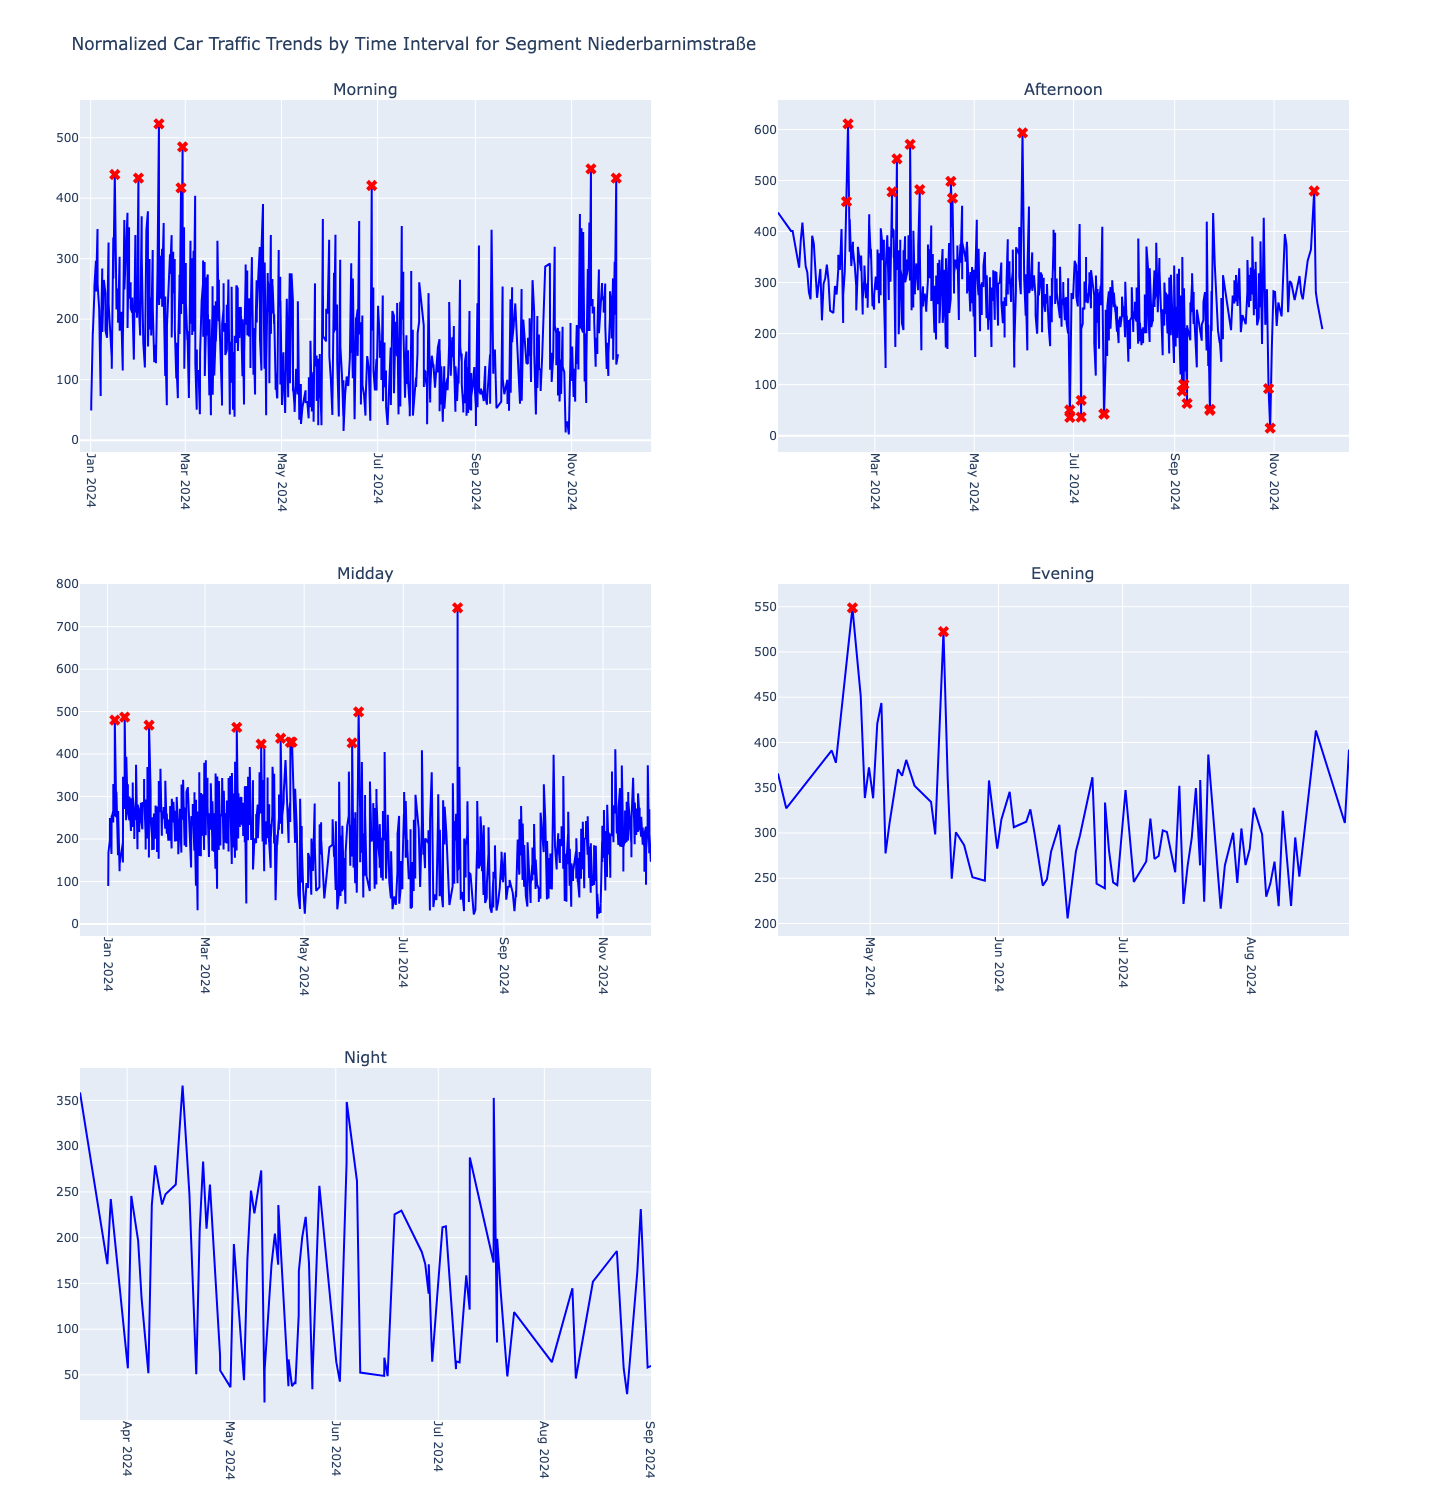

In [183]:
plot_segments_time_interval(9000003000)

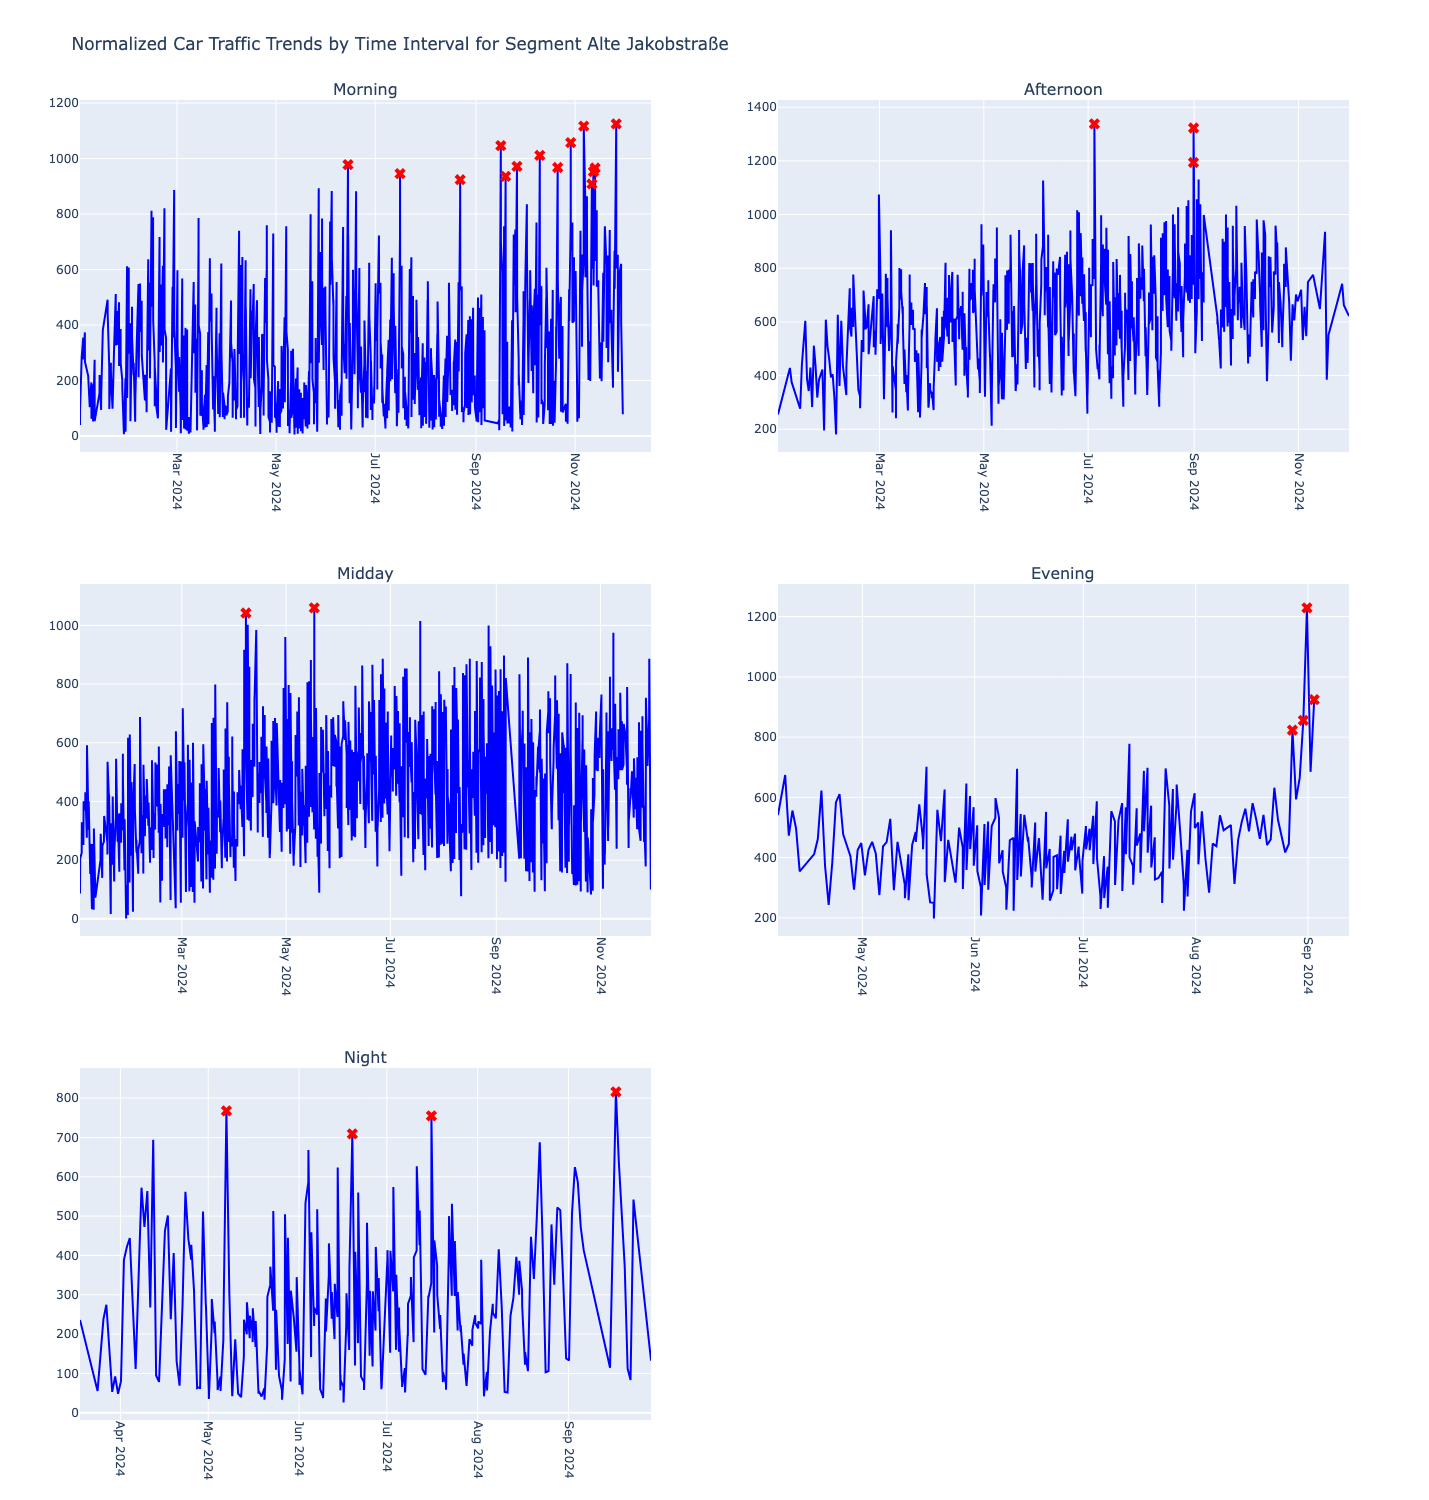

In [184]:
plot_segments_time_interval(9000002582)

In [249]:
berlin_traffic_filtered['normalized_car'].min(),berlin_traffic_filtered['normalized_car'].max()

(0.0, 3272.0206359914373)

## Interpretation of traffic jam anomalies

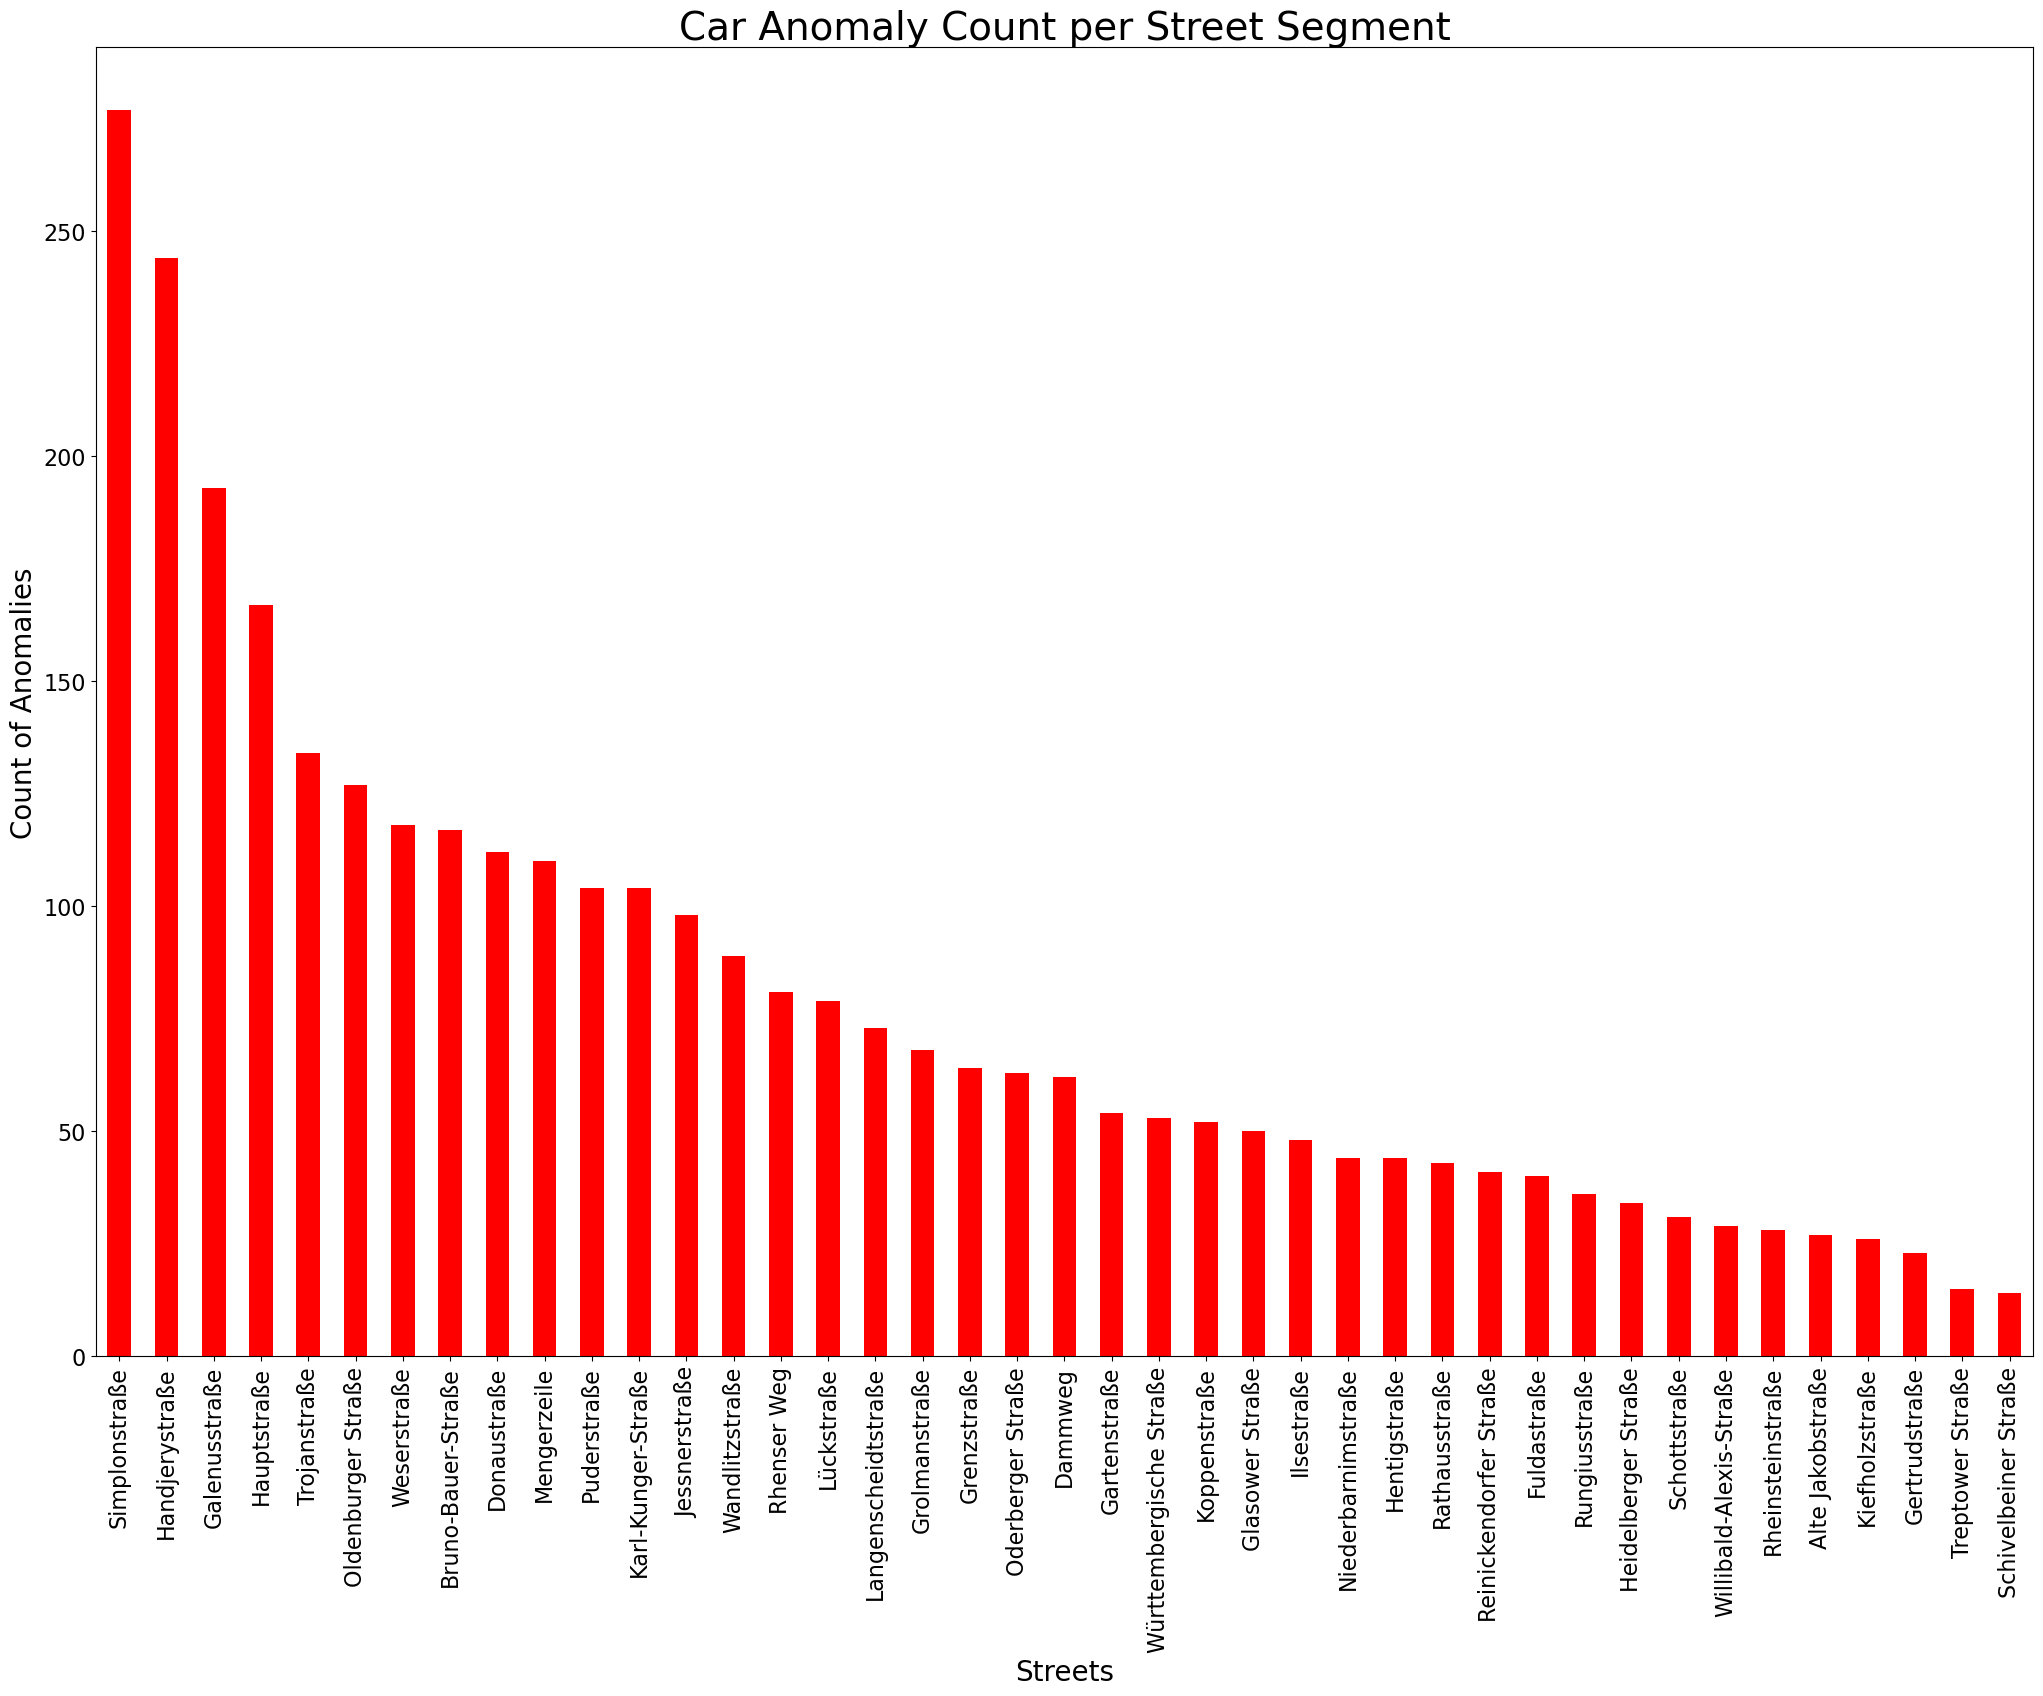

In [185]:
import matplotlib.pyplot as plt

# Remove 'Straße' or 'straße' from the end of the street names (case insensitive)
berlin_traffic_filtered['streets'] = berlin_traffic_filtered['streets'].str.replace(r'St.$', '', case=False, regex=True)

# Count anomalies per segment_id
anomaly_counts = berlin_traffic_filtered[berlin_traffic_filtered['anomaly'] == 1].groupby('streets').size()

# Plot histogram
plt.figure(figsize=(25, 17))  # Increase figure size for better visibility
anomaly_counts.sort_values(ascending=False).plot(kind='bar', color='red')

# Labels and title
plt.xlabel("Streets", fontsize=20)
plt.ylabel("Count of Anomalies", fontsize=20)
plt.title("Car Anomaly Count per Street Segment", fontsize=28)

# Increase tick font sizes
plt.xticks(rotation=90, ha='center', fontsize=16)
plt.yticks(fontsize=16)

# Save plot with a higher dpi for quality
plt.savefig('car_anomaly_count2.png', dpi=300)

# Show the plot
plt.show()


In [186]:
anomaly_counts

streets
Alte Jakobstraße            27
Bruno-Bauer-Straße         117
Dammweg                     62
Donaustraße                112
Fuldastraße                 40
Galenusstraße              193
Gartenstraße                54
Gertrudstraße               23
Glasower Straße             50
Grenzstraße                 64
Grolmanstraße               68
Handjerystraße             244
Hauptstraße                167
Heidelberger Straße         34
Hentigstraße                44
Ilsestraße                  48
Jessnerstraße               98
Karl-Kunger-Straße         104
Kiefholzstraße              26
Koppenstraße                52
Langenscheidtstraße         73
Lückstraße                  79
Mengerzeile                110
Niederbarnimstraße          44
Oderberger Straße           63
Oldenburger Straße         127
Puderstraße                104
Rathausstraße               43
Reinickendorfer Straße      41
Rheinsteinstraße            28
Rhenser Weg                 81
Rungiusstraße               36


- Handjerystraße has the most anomalies = 188 from january to november 2024
- Schivelbeiner Straße has the lowest number of anomalies =13 from januray to novemeber 2024

Hour 0-1: 0 anomalies
Hour 1-2: 0 anomalies
Hour 2-3: 0 anomalies
Hour 3-4: 1 anomalies
Hour 4-5: 13 anomalies
Hour 5-6: 300 anomalies
Hour 6-7: 154 anomalies
Hour 7-8: 269 anomalies
Hour 8-9: 142 anomalies
Hour 9-10: 131 anomalies
Hour 10-11: 174 anomalies
Hour 11-12: 175 anomalies
Hour 12-13: 278 anomalies
Hour 13-14: 499 anomalies
Hour 14-15: 352 anomalies
Hour 15-16: 239 anomalies
Hour 16-17: 177 anomalies
Hour 17-18: 255 anomalies
Hour 18-19: 54 anomalies
Hour 19-20: 3 anomalies
Hour 20-21: 0 anomalies
Hour 21-22: 0 anomalies
Hour 22-23: 0 anomalies
Hour 23-24: 0 anomalies


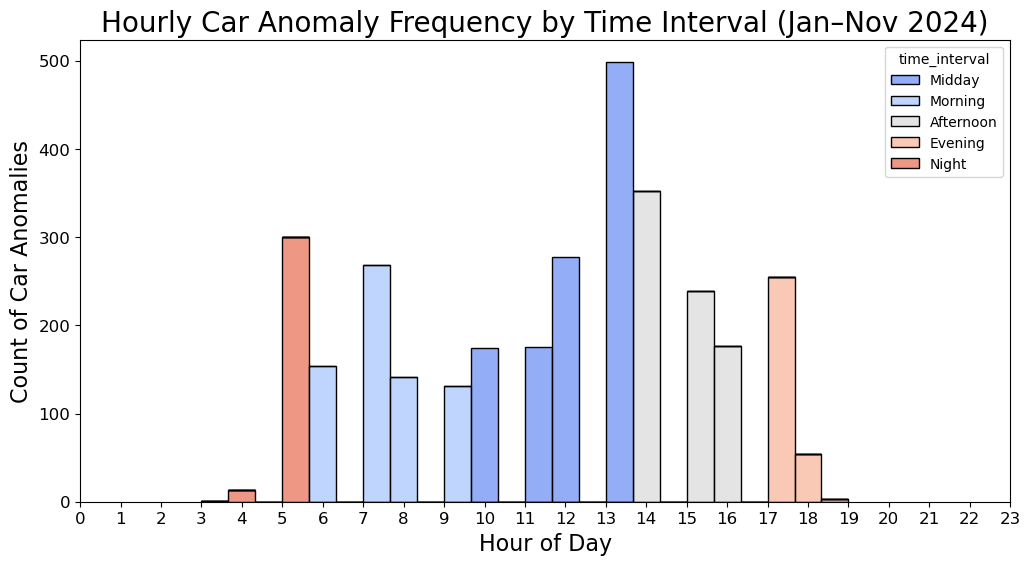

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure 'date' column is in datetime format
berlin_traffic_filtered['hour'] = pd.to_datetime(berlin_traffic_filtered['date']).dt.hour

# Filter only anomalies
anomalies = berlin_traffic_filtered[berlin_traffic_filtered['anomaly'] == 1]

# Compute histogram values
hist_values, bin_edges = np.histogram(anomalies['hour'], bins=24, range=(0, 24))

# Print histogram values
for i in range(len(hist_values)):
    print(f"Hour {bin_edges[i]:.0f}-{bin_edges[i+1]:.0f}: {hist_values[i]} anomalies")

# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=anomalies, x='hour', hue='time_interval', multiple='stack', bins=24, palette='coolwarm')

# Labels and title
plt.xlabel("Hour of Day",fontsize=16)
plt.ylabel("Count of Car Anomalies",fontsize=16)
plt.title("Hourly Car Anomaly Frequency by Time Interval (Jan–Nov 2024)",fontsize=20)

plt.xticks(range(24),fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('car_anomaly_day_count2.png', dpi=300)
# Show the plot
plt.show()


- There are very few anomalies during late night hours (8 PM onward), which makes sense as traffic volume typically drops significantly during this time.
- The peak at 1-2 PM is certainly unusual, especially in comparison to the typical rush hours in the morning and evening.
- The peak at 1-2 PM could be due to a lunch break or shift changes, when people return to the roads after a morning of work, causing congestion or anomalies. This period might experience a spike in traffic as people head back to their destinations after lunch.
- Shift work: If a significant portion of the population works in industries with shift schedules (like factories, retail, or services), this could contribute to a traffic spike around 1 PM as employees come and go.
- The morning traffic jam, particularly between 7-8 AM with 312 anomalies, is likely due to commute time, where people are heading to work or school, causing congestion. 7-8 AM is a typical rush hour when roads are busiest.
- In the afternoon, 2-3 PM sees 319 anomalies due to factors like post-lunch traffic and shift changes, with people returning to work or finishing their lunch breaks. This period also has fewer competing factors like school traffic, which can make the afternoon slightly less congested than the morning rush.

Day Monday: 475 anomalies
Day Tuesday: 562 anomalies
Day Wednesday: 519 anomalies
Day Thursday: 553 anomalies
Day Friday: 581 anomalies
Day Saturday: 307 anomalies
Day Sunday: 219 anomalies


/var/folders/r7/xbd75fl13wvf24ktcp53cf1h0000gn/T/ipykernel_45381/682998641.py:29: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



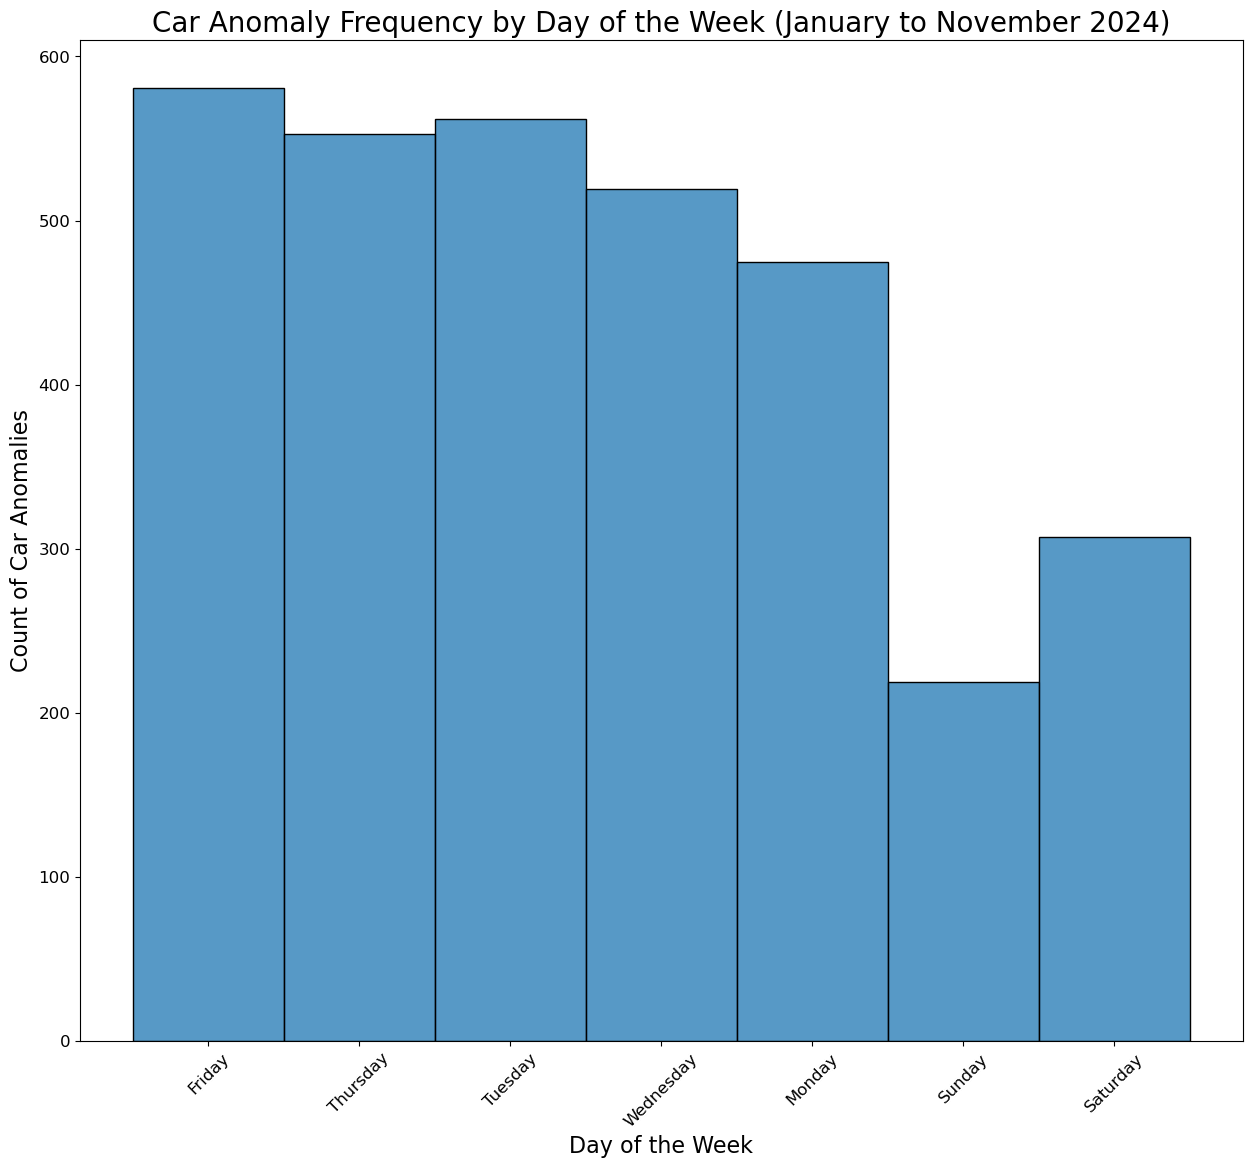

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure 'date' column is in datetime format
berlin_traffic_filtered['dayname'] = pd.to_datetime(berlin_traffic_filtered['date']).dt.day_name()

# Map day names to numerical values
dayname_map = {
    "Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3,
    "Friday": 4, "Saturday": 5, "Sunday": 6
}

berlin_traffic_filtered['dayname_num'] = berlin_traffic_filtered['dayname'].map(dayname_map)

# Filter only anomalies
anomalies = berlin_traffic_filtered[berlin_traffic_filtered['anomaly'] == 1]

# Compute histogram values for the days
hist_values, bin_edges = np.histogram(anomalies['dayname_num'], bins=7, range=(0, 7))

# Print histogram values
for i in range(len(hist_values)):
    print(f"Day {list(dayname_map.keys())[i]}: {hist_values[i]} anomalies")

# Plot with Seaborn (mapping numbers back to day names for x-axis)
plt.figure(figsize=(15, 13))
sns.histplot(data=anomalies, x='dayname', multiple='stack', discrete=True, bins=7, palette='coolwarm')

# Labels and title
plt.xlabel("Day of the Week",fontsize=16)
plt.ylabel("Count of Car Anomalies",fontsize=16)
plt.title("Car Anomaly Frequency by Day of the Week (January to November 2024)",fontsize=20)
plt.xticks(rotation=45,fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.savefig('car_anomaly_weekday_count2.png', dpi=300)
# Show the plot
plt.show()


- The number of anomalies is generally higher during the weekdays, with Thursday having the highest number of anomalies (569).
- Saturday (263 anomalies) and Sunday (193 anomalies) show a significant drop in anomalies compared to weekdays. This indicates that traffic disruptions or anomalies might be lower during the weekend. This could be due to reduced working hours and fewer people commuting.
- This indicates that traffic disruptions or anomalies might be lower during the weekend. This could be due to reduced working hours and fewer people commuting.

Anomalies by Month:
Month January: 430 anomalies
Month February: 300 anomalies
Month March: 312 anomalies
Month April: 259 anomalies
Month May: 281 anomalies
Month June: 243 anomalies
Month July: 210 anomalies
Month August: 154 anomalies
Month September: 519 anomalies
Month October: 207 anomalies
Month November: 301 anomalies
Month December: 0 anomalies


/var/folders/r7/xbd75fl13wvf24ktcp53cf1h0000gn/T/ipykernel_45381/2880061768.py:34: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



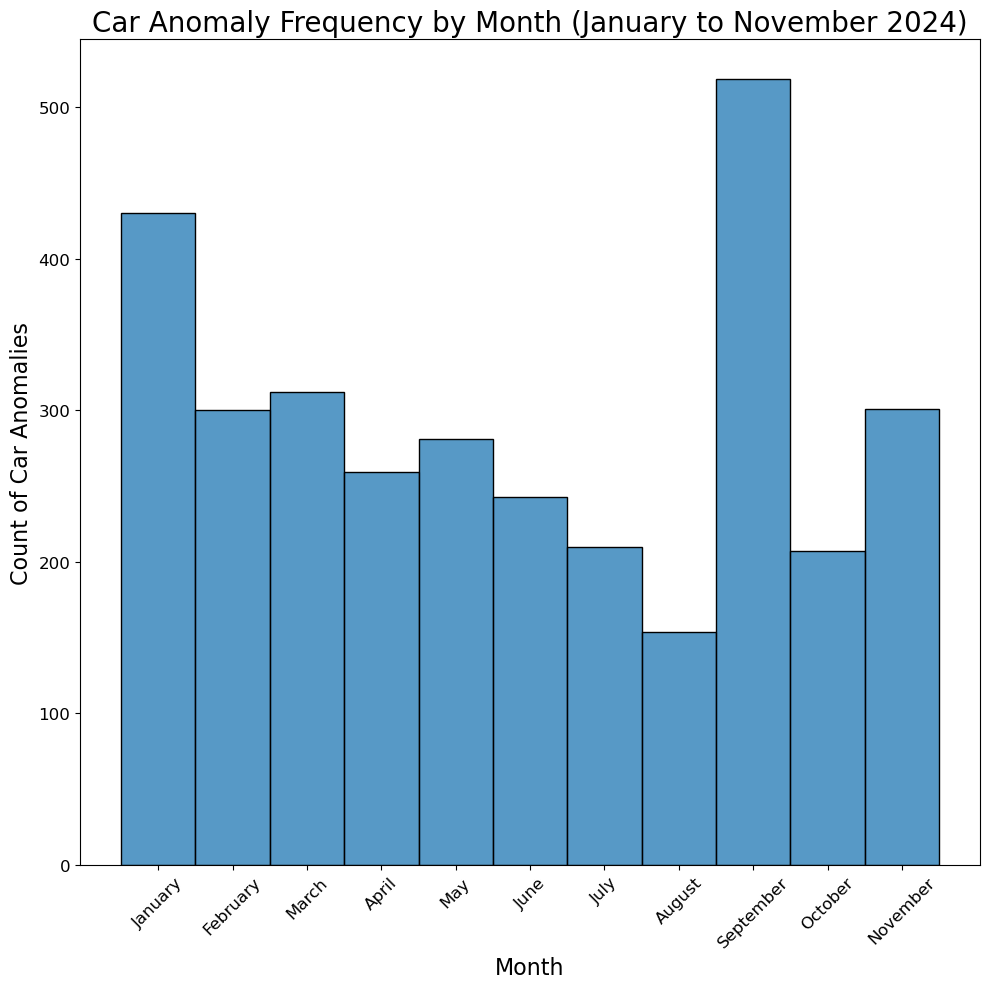

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure 'date' column is in datetime format
berlin_traffic_filtered['date'] = pd.to_datetime(berlin_traffic_filtered['date'])

# Extract month from the date
berlin_traffic_filtered['month'] = berlin_traffic_filtered['date'].dt.month_name()

# Map month names to numerical values
month_map = {
    "January": 1, "February": 2, "March": 3, "April": 4, 
    "May": 5, "June": 6, "July": 7, "August": 8, 
    "September": 9, "October": 10, "November": 11, "December": 12
}

berlin_traffic_filtered['month_num'] = berlin_traffic_filtered['month'].map(month_map)

# Filter only anomalies
anomalies = berlin_traffic_filtered[berlin_traffic_filtered['anomaly'] == 1]

# Compute histogram values for the months
month_hist_values, month_bin_edges = np.histogram(anomalies['month_num'], bins=12, range=(1, 13))

# Print histogram values for the months
print("Anomalies by Month:")
for i in range(len(month_hist_values)):
    print(f"Month {list(month_map.keys())[i]}: {month_hist_values[i]} anomalies")

# Plot with Seaborn
plt.figure(figsize=(10, 10))
sns.histplot(data=anomalies, x='month', multiple='stack', discrete=True, bins=12, palette='coolwarm')

# Labels and title
plt.xlabel("Month", fontsize=16)
plt.ylabel("Count of Car Anomalies", fontsize=16)
plt.title("Car Anomaly Frequency by Month (January to November 2024)", fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Save and Show plot
plt.tight_layout()
plt.savefig('car_anomaly_month_count.png', dpi=300)
plt.show()


Day 01-01: 18 anomalies
Day 01-02: 15 anomalies
Day 01-03: 16 anomalies
Day 01-04: 14 anomalies
Day 01-05: 11 anomalies
Day 01-06: 7 anomalies
Day 01-07: 8 anomalies
Day 01-08: 15 anomalies
Day 01-09: 22 anomalies
Day 01-10: 22 anomalies
Day 01-11: 25 anomalies
Day 01-12: 18 anomalies
Day 01-13: 11 anomalies
Day 01-14: 5 anomalies
Day 01-15: 11 anomalies
Day 01-16: 18 anomalies
Day 01-17: 14 anomalies
Day 01-18: 22 anomalies
Day 01-19: 15 anomalies
Day 01-20: 11 anomalies
Day 01-21: 4 anomalies
Day 01-22: 7 anomalies
Day 01-23: 11 anomalies
Day 01-24: 7 anomalies
Day 01-25: 13 anomalies
Day 01-26: 20 anomalies
Day 01-27: 11 anomalies
Day 01-28: 8 anomalies
Day 01-29: 17 anomalies
Day 01-30: 14 anomalies
Day 01-31: 20 anomalies
Day 02-01: 18 anomalies
Day 02-02: 21 anomalies
Day 02-03: 3 anomalies
Day 02-04: 2 anomalies
Day 02-05: 4 anomalies
Day 02-06: 4 anomalies
Day 02-08: 7 anomalies
Day 02-09: 2 anomalies
Day 02-10: 2 anomalies
Day 02-11: 2 anomalies
Day 02-12: 6 anomalies
Day 02-1

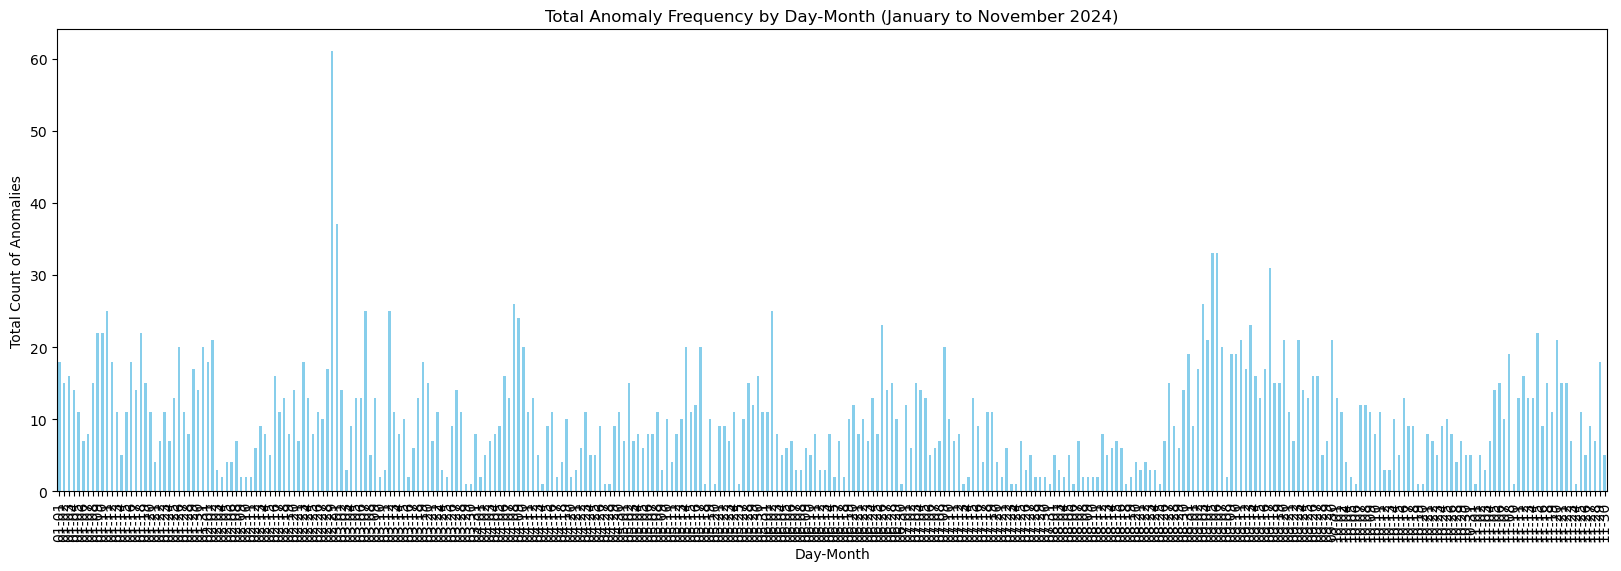

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'date' column is in datetime format
berlin_traffic_filtered['date'] = pd.to_datetime(berlin_traffic_filtered['date'])

# Extract 'day-month' format
berlin_traffic_filtered['day_month'] = berlin_traffic_filtered['date'].dt.strftime('%m-%d')

# Filter only anomalies
anomalies = berlin_traffic_filtered[berlin_traffic_filtered['anomaly'] == 1]

# Group by day_month and count anomalies for each day
anomaly_counts_per_day = anomalies.groupby('day_month').size()

# Sort by day-month (chronologically)
anomaly_counts_per_day = anomaly_counts_per_day.sort_index()

# Print histogram values
for day, count in anomaly_counts_per_day.items():
    print(f"Day {day}: {count} anomalies")

# Plot histogram
plt.figure(figsize=(20, 6))
anomaly_counts_per_day.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Day-Month')
plt.ylabel('Total Count of Anomalies')
plt.title('Total Anomaly Frequency by Day-Month (January to November 2024)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


Based on the data you provided for anomalies across different days of each month, here's an interpretation of the key trends:

### Key Observations:
1. **Peak Anomalies on Specific Days**: 
   - Some days, like **29th February** (67 anomalies) and **31st January** (25 anomalies), experienced unusually high numbers of anomalies. This suggests that these days might be outliers, or they could reflect specific traffic events, external factors, or reporting inconsistencies.
   
2. **Variation Across Days of the Month**:
   - Certain days (like the beginning and end of the month) show higher numbers of anomalies, particularly **01st of January, February, March**, and **April**, where anomalies are consistently higher than other days.
   - In contrast, mid-month days often experience fewer anomalies, especially towards the **14th to 20th** of each month, where the count tends to be lower.

3. **Weekday vs Weekend Patterns**:
   - There are notable peaks in anomalies on **weekdays** (e.g., Monday, Tuesday, Wednesday, Thursday) compared to **weekends**. This could indicate that weekday traffic disruptions or other events (e.g., weather, public holidays, accidents) have more of an impact on traffic flow and anomalies than weekends.
   
4. **Monthly Trends**:
   - The number of anomalies fluctuates month by month, with peaks on **February 29th**, **March 7th**, **April 10th**, and others.
   - There appears to be a drop in anomaly numbers towards the **end of the month**, especially after the 25th of each month, which could point to fewer traffic disruptions or more consistent conditions.

5. **Pattern Consistency**:
   - Most anomalies fall within a **narrow range** (i.e., around 1 to 30 anomalies per day), but there are **occasional spikes** which could indicate certain specific events (e.g., accidents, major disruptions) or extraordinary situations.

### Conclusions:
- **High anomaly days** (e.g., February 29, March 7, April 10) may warrant further investigation into specific events that could have caused them, such as holidays, weather conditions, or public events.
- **Lower anomaly counts** during mid-months (14th to 20th) suggest that traffic during this period tends to be more stable.
- **Weekdays vs. weekends**: Weekdays have higher anomalies, which could suggest regular working-day traffic congestion or disruptions.

### Insights for Future Analysis:
- Focus on understanding the **outlier dates** for deeper insights.
- Check whether anomalies correlate with **local events** (e.g., public holidays, major festivals, strikes).
- Consider the **weather conditions** or **traffic management events** that could explain high anomaly numbers, especially around peaks.


## Autoencoder

In [210]:
berlin_traffic_filtered

instance_id  segment_id                      date interval    uptime  \
0                -1  9000002582 2024-01-01 08:00:00+00:00   hourly  0.798333   
1                -1  9000002582 2024-01-01 09:00:00+00:00   hourly  0.791111   
2                -1  9000002582 2024-01-01 10:00:00+00:00   hourly  0.804167   
3                -1  9000002582 2024-01-01 11:00:00+00:00   hourly  0.790556   
4                -1  9000002582 2024-01-01 12:00:00+00:00   hourly  0.794444   
...             ...         ...                       ...      ...       ...   
142584           -1  9000005977 2024-11-30 10:00:00+00:00   hourly  0.802222   
142585           -1  9000005977 2024-11-30 11:00:00+00:00   hourly  0.788333   
142586           -1  9000005977 2024-11-30 12:00:00+00:00   hourly  0.788056   
142587           -1  9000005977 2024-11-30 13:00:00+00:00   hourly  0.739444   
142588           -1  9000005977 2024-11-30 14:00:00+00:00   hourly  0.634722   

            heavy         car       bike  pedestrian  night  ...  \
0        1.293103   31.186486  36.734590    2.576984    NaN  ...   
1        3.801060   74.396432  20.420038    0.000000    NaN  ...   
2        7.490177   69.363774  67.637787    3.791324    NaN  ...   
3        8.932851  120.113064  34.230636    2.567760    NaN  ...   
4       23.749686  133.431179  59.436894    0.000000    NaN  ...   
...           ...         ...        ...         ...    ...  ...   
142584  16.300651   86.173743  13.551407   11.277808    NaN  ...   
142585   8.858323  110.297623  17.911102    6.302233    NaN  ...   
142586  12.825095   84.950970  21.632174    5.163159    NaN  ...   
142587  21.808438  122.892619  30.083184    6.801461    NaN  ...   
142588  23.875746  160.093075  13.964101    2.544201    NaN  ...   

        normalized_bike  normalized_pedestrian  normalized_heavy  anomaly  \
0             46.014100               3.227954          1.619754        0   
1             25.811846               0.000000          4.804711        0   
2             84.109166               4.714599          9.314210        0   
3             43.299469               3.248045         11.299460        0   
4             74.815671               0.000000         29.894709        0   
...                 ...                    ...               ...      ...   
142584        16.892336              14.058209         20.319371        0   
142585        22.720215               7.994375         11.236773        0   
142586        27.450062               6.551770         16.274354        0   
142587        40.683494               9.198068         29.493004        0   
142588        22.000334               4.008370         37.616056        0   

         dayname  dayname_num     month  month_num  day_month  \
0         Monday            0   January          1      01-01   
1         Monday            0   January          1      01-01   
2         Monday            0   January          1      01-01   
3         Monday            0   January          1      01-01   
4         Monday            0   January          1      01-01   
...          ...          ...       ...        ...        ...   
142584  Saturday            5  November         11      11-30   
142585  Saturday            5  November         11      11-30   
142586  Saturday            5  November         11      11-30   
142587  Saturday            5  November         11      11-30   
142588  Saturday            5  November         11      11-30   

        standardized_car  
0              -0.766961  
1              -0.557582  
2              -0.587231  
3              -0.337087  
4              -0.276072  
...                  ...  
142584         -0.506630  
142585         -0.382875  
142586         -0.505185  
142587         -0.282773  
142588          0.044876  

[142589 rows x 41 columns]

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Initialize the StandardScaler
scaler = StandardScaler()

# Group by 'segment_id' and 'time_interval', then apply standardization
# We use transform instead of fit_transform because we are applying to each group
berlin_traffic_filtered['standardized_car'] = berlin_traffic_filtered.groupby(['segment_id', 'time_interval'])['normalized_car'].transform(lambda x: scaler.fit(x.values.reshape(-1, 1)).transform(x.values.reshape(-1, 1)).flatten())

# View the resulting DataFrame
print(berlin_traffic_filtered[['segment_id', 'time_interval', 'normalized_car', 'standardized_car']].head())


   segment_id time_interval  normalized_car  standardized_car
0  9000002582       Morning       39.064491         -1.077996
1  9000002582       Morning       94.040433         -0.831118
2  9000002582        Midday       86.255471         -1.885400
3  9000002582        Midday      151.935007         -1.550797
4  9000002582        Midday      167.955330         -1.469182


In [232]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'standardized_car' column
Q1 = berlin_traffic_filtered['standardized_car'].quantile(0.25)
Q3 = berlin_traffic_filtered['standardized_car'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for normal data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag anomalies where the values are outside of the IQR range
berlin_traffic_filtered['anomaly'] = berlin_traffic_filtered['standardized_car'].apply(
    lambda x: 1 if x < lower_bound or x > upper_bound else 0
)

# View the resulting DataFrame with anomaly column
print(berlin_traffic_filtered[['segment_id', 'time_interval', 'normalized_car', 'standardized_car', 'anomaly']].head())


   segment_id time_interval  normalized_car  standardized_car  anomaly
0  9000002582       Morning       39.064491         -1.077996        0
1  9000002582       Morning       94.040433         -0.831118        0
2  9000002582        Midday       86.255471         -1.885400        0
3  9000002582        Midday      151.935007         -1.550797        0
4  9000002582        Midday      167.955330         -1.469182        0


In [234]:
berlin_traffic_filtered['standardized_car'].min(),berlin_traffic_filtered['standardized_car'].max()

(-5.304835399430983, 14.310888255885608)

In [235]:
berlin_traffic_filtered['anomaly'] = berlin_traffic_filtered['anomaly'].astype(int)

In [233]:
np.unique(berlin_traffic_filtered['anomaly'])

array([0, 1])

In [236]:
# Count the number of anomalies (1) and non-anomalies (0)
anomaly_counts = berlin_traffic_filtered['anomaly'].value_counts()

# Print the counts
print(f"Number of anomalies: {anomaly_counts.get(1, 0)}")
print(f"Number of non-anomalies: {anomaly_counts.get(0, 0)}")


Number of anomalies: 2383
Number of non-anomalies: 140206


In [237]:
X = berlin_traffic_filtered['standardized_car']
y = berlin_traffic_filtered['anomaly']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

X_train_genuine = X_train[~y_train]
X_test_genuine = X_test[~y_test]

X_train_anomaly = X_train[y_train]
X_test_anomaly = X_test[y_test]

In [238]:
X_train_genuine.shape,X_train_anomaly.shape,X_test_genuine.shape,X_test_anomaly.shape

((112160,), (1911,), (28046,), (472,))

In [239]:
X_train_genuine.min(),X_train_genuine.max()

(-2.65974251172678, 2.540264797173633)

## Training

In [240]:
# Reshape the data into (num_samples, 1) for 1 feature per sample
X_train_genuine_reshaped = X_train_genuine.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

# Convert to PyTorch Tensors
X_train_genuine_tensor = torch.tensor(X_train_genuine_reshaped, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_reshaped, dtype=torch.float32)

# Create DataLoaders
train_loader = DataLoader(TensorDataset(X_train_genuine_tensor), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor), batch_size=64, shuffle=False)

# Define Autoencoder Model
class Autoencoder(nn.Module):
    def __init__(self, input_dim, code_dim=2):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16, code_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(code_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)  # Must match input_dim
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Set input dimension for 1 feature per sample
input_dim = 1
model = Autoencoder(input_dim=input_dim)

# Define Loss and Optimizer
criterion = nn.L1Loss()  # MAE (Mean Absolute Error)
optimizer = optim.Adam(model.parameters())

train_losses = []
val_losses = []

# Training Loop with Early Stopping
best_loss = np.inf
patience, wait = 5, 0  # Early stopping patience
num_epochs = 25

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for batch in train_loader:
        optimizer.zero_grad()
        inputs = batch[0]
        inputs = inputs.view(-1, input_dim)  # Ensure correct shape
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation Step
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in test_loader:
            inputs = batch[0]
            inputs = inputs.view(-1, input_dim)  # Ensure correct shape
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            val_loss += loss.item()

    val_loss /= len(test_loader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")

    # Early Stopping Check
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), "anomaly.pth")  # Save best model
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping triggered.")
            break


Epoch 1/25 - Train Loss: 0.0347 - Val Loss: 0.0148
Epoch 2/25 - Train Loss: 0.0084 - Val Loss: 0.0061
Epoch 3/25 - Train Loss: 0.0078 - Val Loss: 0.0086
Epoch 4/25 - Train Loss: 0.0074 - Val Loss: 0.0029
Epoch 5/25 - Train Loss: 0.0074 - Val Loss: 0.0135
Epoch 6/25 - Train Loss: 0.0070 - Val Loss: 0.0087
Epoch 7/25 - Train Loss: 0.0066 - Val Loss: 0.0069
Epoch 8/25 - Train Loss: 0.0074 - Val Loss: 0.0036
Epoch 9/25 - Train Loss: 0.0065 - Val Loss: 0.0050
Early stopping triggered.


## Train and validation loss:

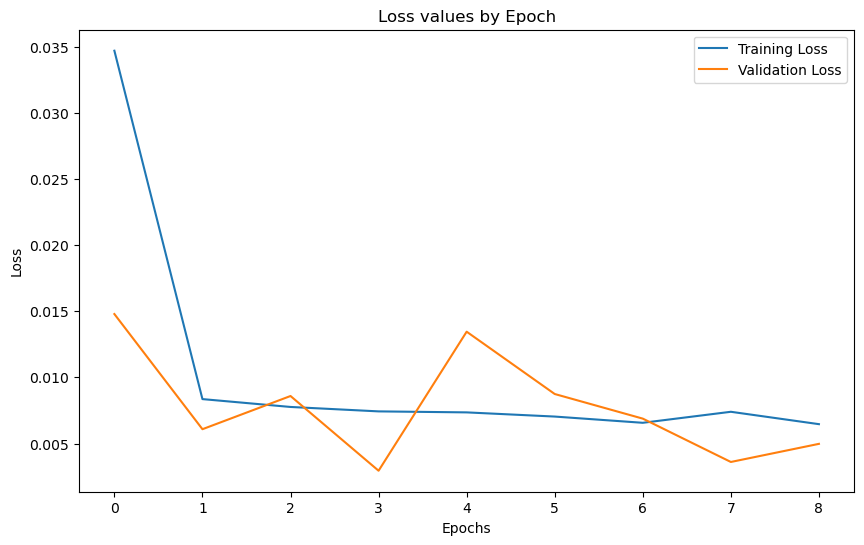

In [241]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss values by Epoch")
plt.show()

## Reconstruction:
It refers to the process of using the learned compressed representation of the input data to generate a reconstruction of the original input. 
We will start by making a prediction on the test set which consists of both classes. After this, we can define a threshold and a metric, depending upon the need. The idea is simple:

If the Reconstruction error is lower than the threshold, the sample is genuine
If the Reconstruction error is higher than the threshold, the sample is fraud
This is because the model was trained with samples of genuine class, so anything outside of this threshold is considered an anomaly.

In [242]:
# Reshape to ensure it's (num_samples, 1) for 1 feature per sample
X_test_tensor = X_test_tensor.view(-1, 1)

# Now pass it through the model
model.eval()  # Set model to evaluation mode

with torch.no_grad():
    reconstructions = model(X_test_tensor)  # Make predictions

# Calculate the reconstruction error
reconstruction_error = torch.mean(torch.abs(reconstructions - X_test_tensor), dim=1)

# Convert reconstruction error to numpy if needed
reconstruction_error = reconstruction_error.numpy()

# Print the first 10 reconstruction errors
print(reconstruction_error[:10])


[0.00556839 0.00652206 0.00252993 0.005162   0.00192557 0.00204444
 0.00393605 0.00207965 0.00190473 0.00682282]


In [243]:
recons_df = pd.DataFrame({
    'error': reconstruction_error,
    'y_true': y_test
}).reset_index(drop=True)
recons_df.head()

error  y_true
0  0.005568   False
1  0.006522   False
2  0.002530   False
3  0.005162   False
4  0.001926   False

## Finding the Ideal Threshold
Choosing the right threshold is crucial in anomaly detection with autoencoders because it determines the tradeoff between detecting anomalies and generating false positives. The threshold determines the cutoff point for the reconstruction error, above which a data point is classified as anomalous. If the threshold is set too low, the autoencoder will classify many normal data points as anomalies, resulting in a high false positive rate. On the other hand, if the threshold is set too high, the autoencoder may miss some true anomalies, resulting in a high false negative rate.

The metric we will choose for this problem is Recall, as we want to reduce False Negatives. Any traffic jam classified as Genuine may lead to unnoticed problems in the system, since there will never be anomaly detected. To find the right threshold value, several values will be tested to find the best combination of metrics. While our goal is to improve Recall, we will also keep track of the accuracy. The tested values will be percentiles of the reconstruction error values.

- Goal: The main objective in anomaly detection for traffic is to identify as many traffic jams as possible, even if some normal traffic conditions are misclassified.
- Safety & Efficiency: Missing a true traffic jam (false negative) can lead to severe consequences like delayed responses, poor traffic management, or even accidents.
- Early Warning: High recall ensures that most congestion events are detected, allowing authorities to take action (e.g., rerouting traffic, adjusting signals).


In [257]:
def thresholdTuning(df, iterations):
    thresh_df = {
        'threshold': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []  # Add F1-score
    }

    for i in range(iterations):
        thresh_value = df['error'].quantile(i / iterations)
        preds = df['error'] > thresh_value  # Classify anomalies based on threshold
        cr = classification_report(df['y_true'], preds, output_dict=True)
        
        acc = cr['accuracy']
        prec = cr['macro avg']['precision']
        rc = cr['macro avg']['recall']
        f1 = cr['macro avg']['f1-score']  # Extract F1-score

        # Store results
        thresh_df['threshold'].append(thresh_value)
        thresh_df['accuracy'].append(acc)
        thresh_df['precision'].append(prec)
        thresh_df['recall'].append(rc)
        thresh_df['f1_score'].append(f1)  # Store F1-score
        
        print(f"Threshold: {thresh_value:.4f} | Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rc:.3f} | F1-score: {f1:.3f}")

    # Convert to DataFrame
    thresh_df = pd.DataFrame(thresh_df)

    # Find best threshold based on max F1-score
    best_thresh = thresh_df.loc[thresh_df['f1_score'].idxmax(), 'threshold']
    print(f"\nBest Threshold based on max F1-score: {best_thresh:.4f}")

    return thresh_df, best_thresh  # Return DataFrame and best threshold

# Run threshold tuning
thresh_df, best_threshold = thresholdTuning(recons_df, 40)


Threshold: 0.0000 | Accuracy: 0.017 | Precision: 0.508 | Recall: 0.500 | F1-score: 0.016
Threshold: 0.0006 | Accuracy: 0.042 | Precision: 0.508 | Recall: 0.513 | F1-score: 0.041
Threshold: 0.0010 | Accuracy: 0.067 | Precision: 0.509 | Recall: 0.525 | F1-score: 0.066
Threshold: 0.0013 | Accuracy: 0.092 | Precision: 0.509 | Recall: 0.538 | F1-score: 0.088
Threshold: 0.0014 | Accuracy: 0.117 | Precision: 0.509 | Recall: 0.551 | F1-score: 0.110
Threshold: 0.0015 | Accuracy: 0.142 | Precision: 0.509 | Recall: 0.564 | F1-score: 0.131
Threshold: 0.0016 | Accuracy: 0.167 | Precision: 0.510 | Recall: 0.576 | F1-score: 0.151
Threshold: 0.0017 | Accuracy: 0.192 | Precision: 0.510 | Recall: 0.589 | F1-score: 0.171
Threshold: 0.0018 | Accuracy: 0.217 | Precision: 0.510 | Recall: 0.602 | F1-score: 0.189
Threshold: 0.0018 | Accuracy: 0.242 | Precision: 0.511 | Recall: 0.614 | F1-score: 0.207
Threshold: 0.0019 | Accuracy: 0.267 | Precision: 0.511 | Recall: 0.627 | F1-score: 0.224
Threshold: 0.0019 | A

In [258]:
threshold=best_threshold
threshold

0.007946485280990602

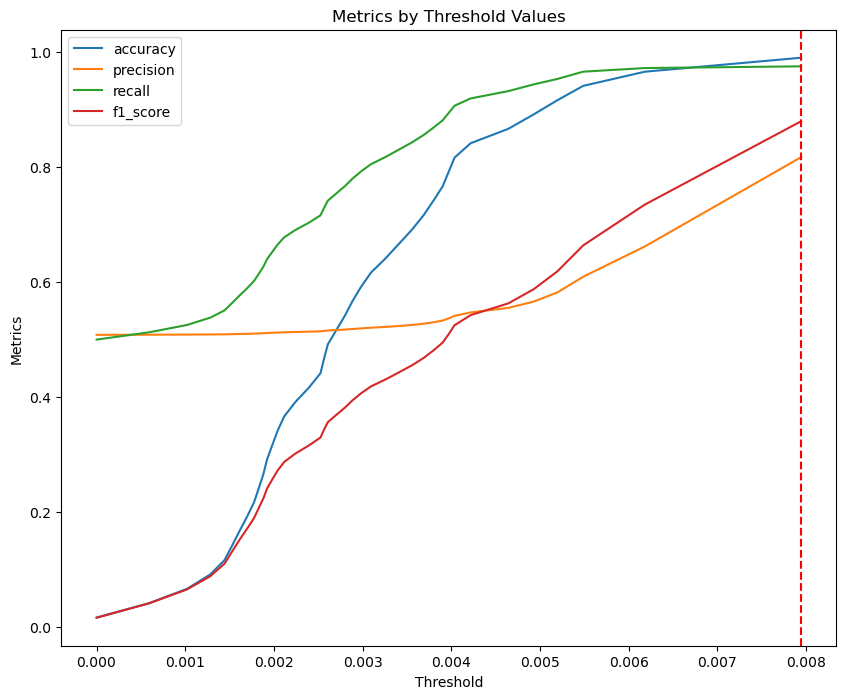

In [259]:
plt.figure(figsize=(10,8))
plt.plot(thresh_df['threshold'], thresh_df['accuracy'], label='accuracy')
plt.plot(thresh_df['threshold'], thresh_df['precision'], label='precision')
plt.plot(thresh_df['threshold'], thresh_df['recall'], label='recall')
plt.plot(thresh_df['threshold'], thresh_df['f1_score'], label='f1_score')
plt.axvline(x=threshold, color='r', linestyle='dashed')
plt.xlabel('Threshold')
plt.ylabel('Metrics')
plt.title('Metrics by Threshold Values')
plt.legend()
plt.savefig('matrics', dpi=300)
plt.show()

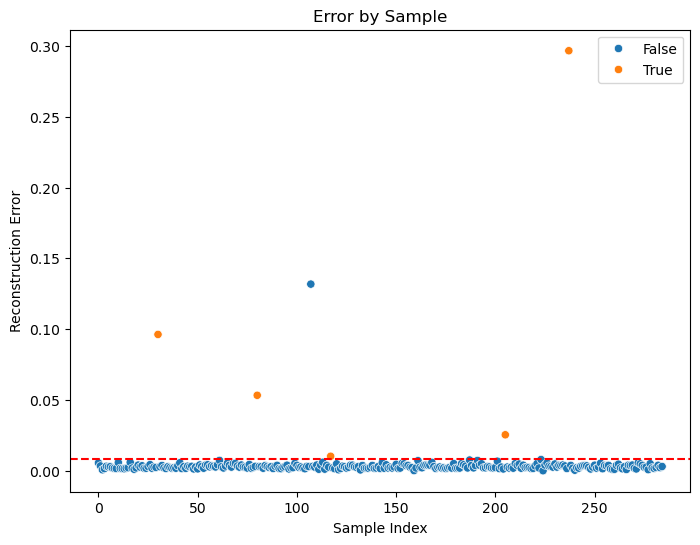

In [261]:
temp = recons_df.sample(frac=0.01, random_state=42).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.scatterplot(data=temp, x=temp.index, y='error', hue='y_true')
plt.axhline(y=threshold, color='r', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Error by Sample')
plt.legend()
plt.savefig('error_by_sample', dpi=300)
plt.show()

The red dashed line represents the threshold. Only 1% of testing data is plotted, for a clearer visualization.

Most blue markers (representing genuine transactions) are concentrated below the threshold
Above the threshold, more orange markers appear, indicating fraud transactions


## Classification

In [248]:
recons_df['y_pred'] = recons_df['error'] > threshold
recons_df.head()

error  y_true  y_pred
0  0.005568   False   False
1  0.006522   False   False
2  0.002530   False   False
3  0.005162   False   False
4  0.001926   False   False

In [249]:
print(classification_report(recons_df['y_true'],recons_df['y_pred']))

              precision    recall  f1-score   support

       False       1.00      0.99      1.00     28046
        True       0.64      0.96      0.76       472

    accuracy                           0.99     28518
   macro avg       0.82      0.98      0.88     28518
weighted avg       0.99      0.99      0.99     28518



- Good Recall for Traffic Jams (83%) ✅ → The model successfully detects most traffic jams.
- Low Precision for Traffic Jams (22%) ❌ → Many normal traffic instances are falsely labeled as jams, leading to false alarms.
- Model is Biased Toward Normal Traffic → It is very confident in normal traffic predictions but struggles to accurately predict anomalies.


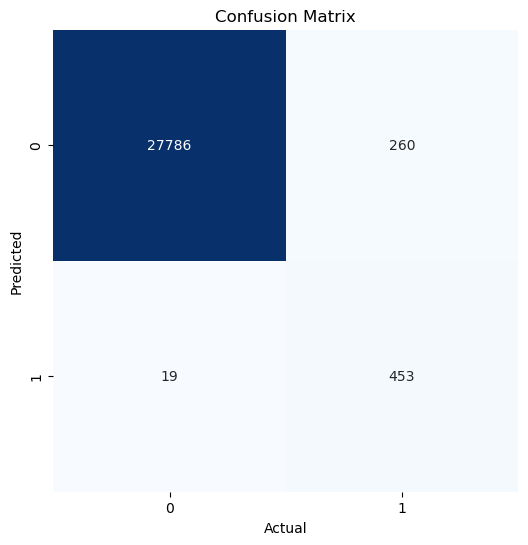

In [262]:
cm = confusion_matrix(recons_df['y_true'],recons_df['y_pred'])
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='.6g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.savefig('confsion_matrix', dpi=300)
plt.show()

In [251]:
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score

# Print evaluation metrics
print(f"Recall Score: {recall_score(recons_df['y_true'], recons_df['y_pred']) * 100:.3f}%")
print(f"Accuracy Score: {accuracy_score(recons_df['y_true'], recons_df['y_pred']) * 100:.3f}%")
print(f"Precision Sco¢$re: {precision_score(recons_df['y_true'], recons_df['y_pred']) * 100:.3f}%")
print(f"F1 Score: {f1_score(recons_df['y_true'], recons_df['y_pred']) * 100:.3f}%")


Recall Score: 95.975%
Accuracy Score: 99.022%
Precision Score: 63.534%
F1 Score: 76.456%
